# Generate Forecast: Electronic Transaction Forecast

## Objectives of Notebook

This notebook aims to:

* Perform forecast using pre-trained model.
* Combine forecast result into one dataframe.

## Import Libraries

In [1]:
%autosave 60
%load_ext autoreload
%autoreload 2

Autosaving every 60 seconds


In [2]:
import pandas as pd
import pickle
import warnings
import logging
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
scaler = Scaler()

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
logging.disable(logging.CRITICAL)

## Import Customised Functions from Source Code

In [3]:
# Import Functions for Plotting
from src.plot import  plot_actual_pred

# Import Functions for train & predict
from src.train import pred_model, out_pred_df

## Import Preprocessed Data

* Data that have been preprocessed on previous notebook.

In [4]:
# Load previous DataFrame from previous notebook
%store -r debit
%store -r credit
%store -r ue_bank
%store -r ue_nonbank
%store -r qris
%store -r digital_banking

%store -r debit_breakdown
%store -r credit_breakdown
%store -r ue_bank_breakdown
%store -r ue_nonbank_breakdown
%store -r digital_banking_breakdown

In [5]:
# Convert Debit DataFrames into TimeSeries for each transaction volume and nominal
debit_vol = TimeSeries.from_dataframe(debit, value_cols='transaction_volume', fill_missing_dates=True, freq=None)
debit_nom = TimeSeries.from_dataframe(debit, value_cols='transaction_nominal', fill_missing_dates=True, freq=None)

# Convert Credit DataFrames into TimeSeries for each transaction volume and nominal
credit_vol = TimeSeries.from_dataframe(credit, value_cols='transaction_volume', fill_missing_dates=True, freq=None)
credit_nom = TimeSeries.from_dataframe(credit, value_cols='transaction_nominal', fill_missing_dates=True, freq=None)

# Convert UE Bank DataFrames into TimeSeries for each transaction volume and nominal
ue_bank_vol = TimeSeries.from_dataframe(ue_bank, value_cols='transaction_volume', fill_missing_dates=True, freq=None)
ue_bank_nom = TimeSeries.from_dataframe(ue_bank, value_cols='transaction_nominal', fill_missing_dates=True, freq=None)

# Convert UE Non-Bank DataFrames into TimeSeries for each transaction volume and nominal
ue_nonbank_vol = TimeSeries.from_dataframe(ue_nonbank, value_cols='transaction_volume', fill_missing_dates=True, freq=None)
ue_nonbank_nom = TimeSeries.from_dataframe(ue_nonbank, value_cols='transaction_nominal', fill_missing_dates=True, freq=None)

# Convert QRIS DataFrames into TimeSeries for each transaction volume and nominal
qris_vol = TimeSeries.from_dataframe(qris, value_cols='transaction_volume', fill_missing_dates=True, freq=None)
qris_nom = TimeSeries.from_dataframe(qris, value_cols='transaction_nominal', fill_missing_dates=True, freq=None)

# Convert Digital Banking DataFrames into TimeSeries for each transaction volume and nominal
digital_banking_vol = TimeSeries.from_dataframe(digital_banking, value_cols='transaction_volume', fill_missing_dates=True, freq=None)
digital_banking_nom = TimeSeries.from_dataframe(digital_banking, value_cols='transaction_nominal', fill_missing_dates=True, freq=None)

## Electronic Transaction Nominal Forecast

In [6]:
# Set forecast horizon
forecast_horizon = 12 # in months

In [7]:
#
model_path = r'C:\Users\ASUS\OneDrive - Universiti Malaya\Sem 7\FYP\Model pkl\\'

### | Prophet

#### | Debit Vol Prophet Forecast

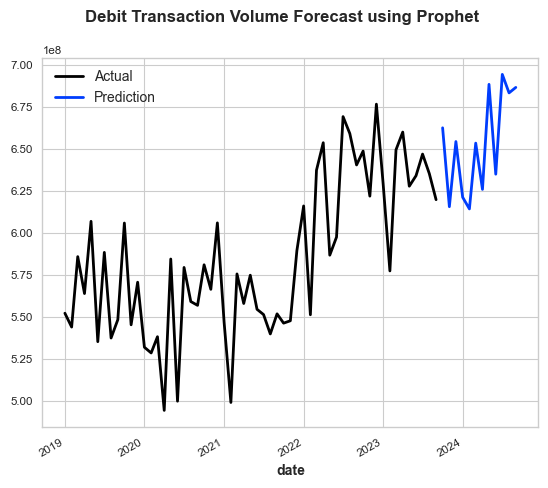

In [8]:
# Import pre-trained Prophet debit model from pickle file
debit_vol_prophet = pickle.load(open(model_path + 'debit_vol_prophet.pkl', 'rb'))

# Forecast debit transaction volume using Prophet model
pred_debit_vol_prophet = pred_model(model=debit_vol_prophet, len=forecast_horizon, train=debit_vol)

# Plot the forecast result
plot_actual_pred(actual=debit_vol, 
                 pred=pred_debit_vol_prophet, 
                 suptitle='Debit Transaction Volume Forecast using Prophet', 
)

In [9]:
# Create a DataFrame for debit transaction volume forecast result 
debit_vol_prophet = out_pred_df(model=debit_vol_prophet, 
                                len=forecast_horizon,
                                train=debit_vol,
                                type_name='Debit',
                                model_name='Prophet',
                                col_id='_vol'
)

# Show debit_vol_prophet DataFrame
debit_vol_prophet

  0%|          | 0/13 [00:00<?, ?it/s]

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol
0,2019-01-01,Debit,Actual,5.521845e+08,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Debit,Actual,5.439533e+08,NaN,NaN,NaN,NaN,NaN,-0.0149
2,2019-03-01,Debit,Actual,5.858424e+08,NaN,NaN,NaN,NaN,NaN,0.0770
3,2019-04-01,Debit,Actual,5.638822e+08,NaN,NaN,NaN,NaN,NaN,-0.0375
4,2019-05-01,Debit,Actual,6.068453e+08,NaN,NaN,NaN,NaN,NaN,0.0762
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Debit,Prophet,6.883511e+08,0.03,25470327.0,21141962.0,14.0,0.0706,0.0998
78,2024-06-01,Debit,Prophet,6.349068e+08,0.03,25470327.0,21141962.0,14.0,0.0482,-0.0776
79,2024-07-01,Debit,Prophet,6.942783e+08,0.03,25470327.0,21141962.0,14.0,0.0582,0.0935
80,2024-08-01,Debit,Prophet,6.832712e+08,0.03,25470327.0,21141962.0,14.0,0.1051,-0.0159


#### | Debit Nom Prophet Forecast

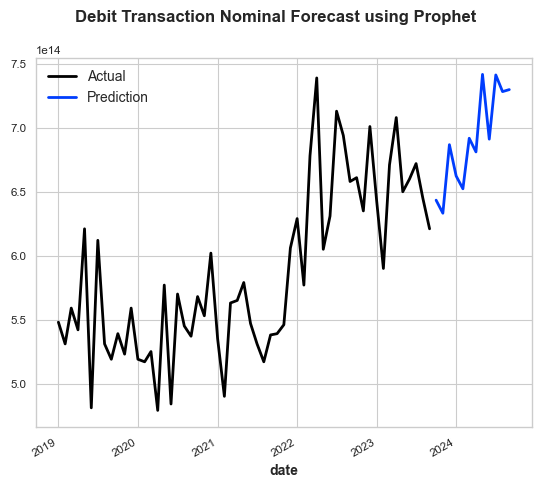

In [10]:
# Import pre-trained Prophet debit model from pickle file
debit_nom_prophet = pickle.load(open(model_path + 'debit_nom_prophet.pkl', 'rb'))

# Forecast debit transaction nominal using Prophet model
pred_debit_nom_prophet = pred_model(model=debit_nom_prophet, len=forecast_horizon, train=debit_nom)

# Plot the forecast result
plot_actual_pred(actual=debit_nom, 
                 pred=pred_debit_nom_prophet, 
                 suptitle='Debit Transaction Nominal Forecast using Prophet', 
)

In [11]:
# Create a DataFrame for debit transaction nominal forecast result
debit_nom_prophet = out_pred_df(model=debit_nom_prophet, 
                                len=forecast_horizon,
                                train=debit_nom,
                                type_name='Debit',
                                model_name='Prophet',
                                col_id='_nom'
)

# Show debit_nom_prophet DataFrame
debit_nom_prophet

  0%|          | 0/13 [00:00<?, ?it/s]

component,date,type,model,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,Debit,Actual,5.480000e+14,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Debit,Actual,5.310000e+14,NaN,NaN,NaN,NaN,NaN,-0.0310
2,2019-03-01,Debit,Actual,5.590000e+14,NaN,NaN,NaN,NaN,NaN,0.0527
3,2019-04-01,Debit,Actual,5.420000e+14,NaN,NaN,NaN,NaN,NaN,-0.0304
4,2019-05-01,Debit,Actual,6.210000e+14,NaN,NaN,NaN,NaN,NaN,0.1458
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Debit,Prophet,7.417779e+14,0.04,3.405061e+13,2.769318e+13,9.3,0.1025,0.0890
78,2024-06-01,Debit,Prophet,6.911332e+14,0.04,3.405061e+13,2.769318e+13,9.3,0.1709,-0.0683
79,2024-07-01,Debit,Prophet,7.413325e+14,0.04,3.405061e+13,2.769318e+13,9.3,0.0528,0.0726
80,2024-08-01,Debit,Prophet,7.283126e+14,0.04,3.405061e+13,2.769318e+13,9.3,0.1388,-0.0176


#### | Debit Vol & Debit Nom Prophet Forecast Merge

In [12]:
# Merge debit_vol_prophet and debit_nom_prophet DataFrames
debit_prophet = pd.merge(debit_vol_prophet, debit_nom_prophet, on=['date', 'type', 'model'])

# Show debit_prophet DataFrame
debit_prophet

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,Debit,Actual,5.521845e+08,NaN,NaN,NaN,NaN,NaN,NaN,5.480000e+14,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Debit,Actual,5.439533e+08,NaN,NaN,NaN,NaN,NaN,-0.0149,5.310000e+14,NaN,NaN,NaN,NaN,NaN,-0.0310
2,2019-03-01,Debit,Actual,5.858424e+08,NaN,NaN,NaN,NaN,NaN,0.0770,5.590000e+14,NaN,NaN,NaN,NaN,NaN,0.0527
3,2019-04-01,Debit,Actual,5.638822e+08,NaN,NaN,NaN,NaN,NaN,-0.0375,5.420000e+14,NaN,NaN,NaN,NaN,NaN,-0.0304
4,2019-05-01,Debit,Actual,6.068453e+08,NaN,NaN,NaN,NaN,NaN,0.0762,6.210000e+14,NaN,NaN,NaN,NaN,NaN,0.1458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Debit,Prophet,6.883511e+08,0.03,25470327.0,21141962.0,14.0,0.0706,0.0998,7.417779e+14,0.04,3.405061e+13,2.769318e+13,9.3,0.1025,0.0890
78,2024-06-01,Debit,Prophet,6.349068e+08,0.03,25470327.0,21141962.0,14.0,0.0482,-0.0776,6.911332e+14,0.04,3.405061e+13,2.769318e+13,9.3,0.1709,-0.0683
79,2024-07-01,Debit,Prophet,6.942783e+08,0.03,25470327.0,21141962.0,14.0,0.0582,0.0935,7.413325e+14,0.04,3.405061e+13,2.769318e+13,9.3,0.0528,0.0726
80,2024-08-01,Debit,Prophet,6.832712e+08,0.03,25470327.0,21141962.0,14.0,0.1051,-0.0159,7.283126e+14,0.04,3.405061e+13,2.769318e+13,9.3,0.1388,-0.0176


#### | Credit Vol Prophet Forecast

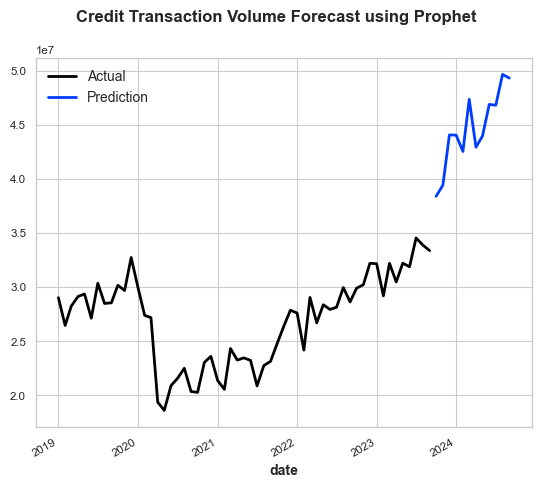

In [13]:
# Import pre-trained Prophet credit model from pickle file
credit_vol_prophet = pickle.load(open(model_path + 'credit_vol_prophet.pkl', 'rb'))

# Forecast credit transaction volume using Prophet model
pred_credit_vol_prophet = pred_model(model=credit_vol_prophet, len=forecast_horizon, train=credit_vol)

# Plot the forecast result
plot_actual_pred(actual=credit_vol, 
                 pred=pred_credit_vol_prophet, 
                 suptitle='Credit Transaction Volume Forecast using Prophet', 
)

In [14]:
# Create a DataFrame for credit transaction volume forecast result
credit_vol_prophet = out_pred_df(model=credit_vol_prophet, 
                                 len=forecast_horizon,
                                 train=credit_vol,
                                 type_name='Credit',
                                 model_name='Prophet',
                                 col_id='_vol'
)

# Show credit_vol_prophet DataFrame
credit_vol_prophet

  0%|          | 0/13 [00:00<?, ?it/s]

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol
0,2019-01-01,Credit,Actual,2.901256e+07,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Credit,Actual,2.644951e+07,NaN,NaN,NaN,NaN,NaN,-0.0883
2,2019-03-01,Credit,Actual,2.823013e+07,NaN,NaN,NaN,NaN,NaN,0.0673
3,2019-04-01,Credit,Actual,2.912024e+07,NaN,NaN,NaN,NaN,NaN,0.0315
4,2019-05-01,Credit,Actual,2.935492e+07,NaN,NaN,NaN,NaN,NaN,0.0081
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Credit,Prophet,4.395701e+07,0.09,3298421.0,2139766.0,7.4,0.3895,0.0243
78,2024-06-01,Credit,Prophet,4.686672e+07,0.09,3298421.0,2139766.0,7.4,0.5695,0.0662
79,2024-07-01,Credit,Prophet,4.679183e+07,0.09,3298421.0,2139766.0,7.4,0.4172,-0.0016
80,2024-08-01,Credit,Prophet,4.964151e+07,0.09,3298421.0,2139766.0,7.4,0.4655,0.0609


#### | Credit Nom Prophet Forecast

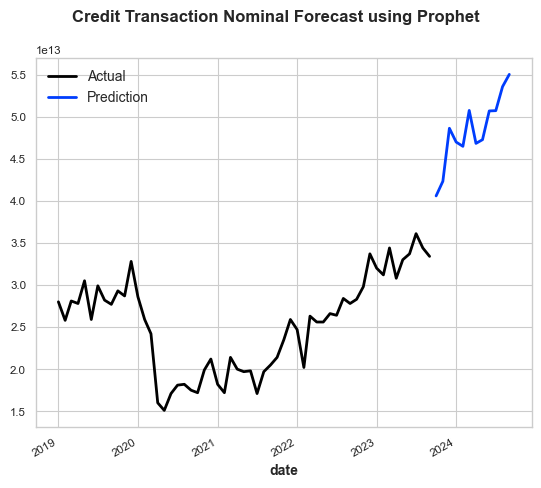

In [15]:
# Import pre-trained Prophet credit model from pickle file
credit_nom_prophet = pickle.load(open(model_path + 'credit_nom_prophet.pkl', 'rb'))

# Forecast credit transaction nominal using Prophet model
pred_credit_nom_prophet = pred_model(model=credit_nom_prophet, len=forecast_horizon, train=credit_nom)

# Plot the forecast result
plot_actual_pred(actual=credit_nom, 
                 pred=pred_credit_nom_prophet, 
                 suptitle='Credit Transaction Nominal Forecast using Prophet', 
)

In [16]:
# Create a DataFrame for credit transaction nominal forecast result
credit_nom_prophet = out_pred_df(model=credit_nom_prophet, 
                                 len=forecast_horizon,
                                 train=credit_nom,
                                 type_name='Credit',
                                 model_name='Prophet',
                                 col_id='_nom'
)

# Show credit_nom_prophet DataFrame
credit_nom_prophet

  0%|          | 0/13 [00:00<?, ?it/s]

component,date,type,model,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,Credit,Actual,2.800000e+13,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Credit,Actual,2.580000e+13,NaN,NaN,NaN,NaN,NaN,-0.0786
2,2019-03-01,Credit,Actual,2.810000e+13,NaN,NaN,NaN,NaN,NaN,0.0891
3,2019-04-01,Credit,Actual,2.780000e+13,NaN,NaN,NaN,NaN,NaN,-0.0107
4,2019-05-01,Credit,Actual,3.050000e+13,NaN,NaN,NaN,NaN,NaN,0.0971
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Credit,Prophet,4.726583e+13,0.23,6.267042e+12,4.741690e+12,3.3,0.4115,0.0095
78,2024-06-01,Credit,Prophet,5.068045e+13,0.23,6.267042e+12,4.741690e+12,3.3,0.6424,0.0722
79,2024-07-01,Credit,Prophet,5.071210e+13,0.23,6.267042e+12,4.741690e+12,3.3,0.4474,0.0006
80,2024-08-01,Credit,Prophet,5.356506e+13,0.23,6.267042e+12,4.741690e+12,3.3,0.4582,0.0563


#### | Credit Vol & Credit Nom Prophet Forecast Merge

In [17]:
# Merge credit_vol_prophet and credit_nom_prophet DataFrames
credit_prophet = pd.merge(credit_vol_prophet, credit_nom_prophet, on=['date', 'type', 'model'])

# Show credit_prophet DataFrame
credit_prophet

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,Credit,Actual,2.901256e+07,NaN,NaN,NaN,NaN,NaN,NaN,2.800000e+13,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Credit,Actual,2.644951e+07,NaN,NaN,NaN,NaN,NaN,-0.0883,2.580000e+13,NaN,NaN,NaN,NaN,NaN,-0.0786
2,2019-03-01,Credit,Actual,2.823013e+07,NaN,NaN,NaN,NaN,NaN,0.0673,2.810000e+13,NaN,NaN,NaN,NaN,NaN,0.0891
3,2019-04-01,Credit,Actual,2.912024e+07,NaN,NaN,NaN,NaN,NaN,0.0315,2.780000e+13,NaN,NaN,NaN,NaN,NaN,-0.0107
4,2019-05-01,Credit,Actual,2.935492e+07,NaN,NaN,NaN,NaN,NaN,0.0081,3.050000e+13,NaN,NaN,NaN,NaN,NaN,0.0971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Credit,Prophet,4.395701e+07,0.09,3298421.0,2139766.0,7.4,0.3895,0.0243,4.726583e+13,0.23,6.267042e+12,4.741690e+12,3.3,0.4115,0.0095
78,2024-06-01,Credit,Prophet,4.686672e+07,0.09,3298421.0,2139766.0,7.4,0.5695,0.0662,5.068045e+13,0.23,6.267042e+12,4.741690e+12,3.3,0.6424,0.0722
79,2024-07-01,Credit,Prophet,4.679183e+07,0.09,3298421.0,2139766.0,7.4,0.4172,-0.0016,5.071210e+13,0.23,6.267042e+12,4.741690e+12,3.3,0.4474,0.0006
80,2024-08-01,Credit,Prophet,4.964151e+07,0.09,3298421.0,2139766.0,7.4,0.4655,0.0609,5.356506e+13,0.23,6.267042e+12,4.741690e+12,3.3,0.4582,0.0563


#### | UE Bank Vol Prophet Forecast

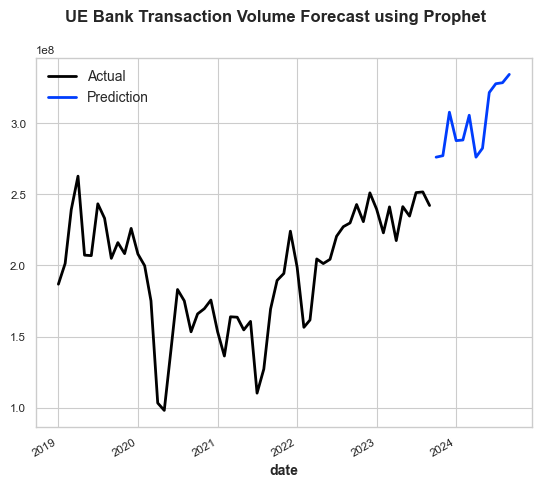

In [18]:
# Import pre-trained Prophet UE Bank model from pickle file
ue_bank_vol_prophet = pickle.load(open(model_path + 'ue_bank_vol_prophet.pkl', 'rb'))

# Forecast UE Bank transaction volume using Prophet model
pred_ue_bank_vol_prophet = pred_model(model=ue_bank_vol_prophet, len=forecast_horizon, train=ue_bank_vol)

# Plot the forecast result
plot_actual_pred(actual=ue_bank_vol, 
                 pred=pred_ue_bank_vol_prophet, 
                 suptitle='UE Bank Transaction Volume Forecast using Prophet', 
)

In [19]:
# Create a DataFrame for UE Bank transaction volume forecast result
ue_bank_vol_prophet = out_pred_df(model=ue_bank_vol_prophet, 
                                  len=forecast_horizon,
                                  train=ue_bank_vol,
                                  type_name='UE Bank',
                                  model_name='Prophet',
                                  col_id='_vol'
)

# Show ue_bank_vol_prophet DataFrame
ue_bank_vol_prophet

  0%|          | 0/13 [00:00<?, ?it/s]

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol
0,2019-01-01,UE Bank,Actual,1.868224e+08,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,UE Bank,Actual,2.013995e+08,NaN,NaN,NaN,NaN,NaN,0.0780
2,2019-03-01,UE Bank,Actual,2.392136e+08,NaN,NaN,NaN,NaN,NaN,0.1878
3,2019-04-01,UE Bank,Actual,2.628318e+08,NaN,NaN,NaN,NaN,NaN,0.0987
4,2019-05-01,UE Bank,Actual,2.072598e+08,NaN,NaN,NaN,NaN,NaN,-0.2114
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,UE Bank,Prophet,2.824887e+08,0.34,62870746.0,55763193.0,3.6,0.9617,0.0228
78,2024-06-01,UE Bank,Prophet,3.216851e+08,0.34,62870746.0,55763193.0,3.6,0.8241,0.1388
79,2024-07-01,UE Bank,Prophet,3.278691e+08,0.34,62870746.0,55763193.0,3.6,0.4533,0.0192
80,2024-08-01,UE Bank,Prophet,3.285793e+08,0.34,62870746.0,55763193.0,3.6,0.3513,0.0022


#### | UE Bank Nom Prophet Forecast

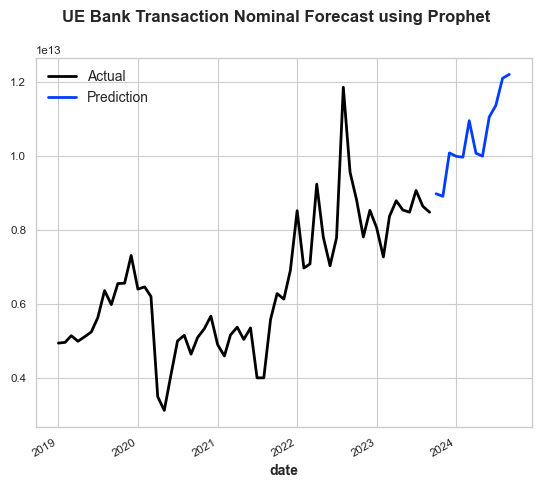

In [20]:
# Import pre-trained Prophet UE Bank model from pickle file
ue_bank_nom_prophet = pickle.load(open(model_path + 'ue_bank_nom_prophet.pkl', 'rb'))

# Forecast UE Bank transaction nominal using Prophet model
pred_ue_bank_nom_prophet = pred_model(model=ue_bank_nom_prophet, len=forecast_horizon, train=ue_bank_nom)

# Plot the forecast result
plot_actual_pred(actual=ue_bank_nom, 
                 pred=pred_ue_bank_nom_prophet, 
                 suptitle='UE Bank Transaction Nominal Forecast using Prophet', 
)

In [21]:
# Create a DataFrame for UE Bank transaction nominal forecast result
ue_bank_nom_prophet = out_pred_df(model=ue_bank_nom_prophet, 
                                  len=forecast_horizon,
                                  train=ue_bank_nom,
                                  type_name='UE Bank',
                                  model_name='Prophet',
                                  col_id='_nom'
)

# Show ue_bank_nom_prophet DataFrame
ue_bank_nom_prophet

  0%|          | 0/13 [00:00<?, ?it/s]

component,date,type,model,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,UE Bank,Actual,4.940000e+12,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,UE Bank,Actual,4.960000e+12,NaN,NaN,NaN,NaN,NaN,0.0040
2,2019-03-01,UE Bank,Actual,5.140000e+12,NaN,NaN,NaN,NaN,NaN,0.0363
3,2019-04-01,UE Bank,Actual,4.990000e+12,NaN,NaN,NaN,NaN,NaN,-0.0292
4,2019-05-01,UE Bank,Actual,5.110000e+12,NaN,NaN,NaN,NaN,NaN,0.0240
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,UE Bank,Prophet,9.996324e+12,0.2,1.725896e+12,1.305124e+12,9.1,0.5721,-0.0078
78,2024-06-01,UE Bank,Prophet,1.105782e+13,0.2,1.725896e+12,1.305124e+12,9.1,0.8691,0.1062
79,2024-07-01,UE Bank,Prophet,1.136469e+13,0.2,1.725896e+12,1.305124e+12,9.1,0.6880,0.0278
80,2024-08-01,UE Bank,Prophet,1.210069e+13,0.2,1.725896e+12,1.305124e+12,9.1,0.3396,0.0648


#### | UE Bank Vol & UE Bank Nom Prophet Forecast Merge

In [22]:
# Merge ue_bank_vol_prophet and ue_bank_nom_prophet DataFrames
ue_bank_prophet = pd.merge(ue_bank_vol_prophet, ue_bank_nom_prophet, on=['date', 'type', 'model'])

# Show ue_bank_prophet DataFrame
ue_bank_prophet

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,UE Bank,Actual,1.868224e+08,NaN,NaN,NaN,NaN,NaN,NaN,4.940000e+12,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,UE Bank,Actual,2.013995e+08,NaN,NaN,NaN,NaN,NaN,0.0780,4.960000e+12,NaN,NaN,NaN,NaN,NaN,0.0040
2,2019-03-01,UE Bank,Actual,2.392136e+08,NaN,NaN,NaN,NaN,NaN,0.1878,5.140000e+12,NaN,NaN,NaN,NaN,NaN,0.0363
3,2019-04-01,UE Bank,Actual,2.628318e+08,NaN,NaN,NaN,NaN,NaN,0.0987,4.990000e+12,NaN,NaN,NaN,NaN,NaN,-0.0292
4,2019-05-01,UE Bank,Actual,2.072598e+08,NaN,NaN,NaN,NaN,NaN,-0.2114,5.110000e+12,NaN,NaN,NaN,NaN,NaN,0.0240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,UE Bank,Prophet,2.824887e+08,0.34,62870746.0,55763193.0,3.6,0.9617,0.0228,9.996324e+12,0.2,1.725896e+12,1.305124e+12,9.1,0.5721,-0.0078
78,2024-06-01,UE Bank,Prophet,3.216851e+08,0.34,62870746.0,55763193.0,3.6,0.8241,0.1388,1.105782e+13,0.2,1.725896e+12,1.305124e+12,9.1,0.8691,0.1062
79,2024-07-01,UE Bank,Prophet,3.278691e+08,0.34,62870746.0,55763193.0,3.6,0.4533,0.0192,1.136469e+13,0.2,1.725896e+12,1.305124e+12,9.1,0.6880,0.0278
80,2024-08-01,UE Bank,Prophet,3.285793e+08,0.34,62870746.0,55763193.0,3.6,0.3513,0.0022,1.210069e+13,0.2,1.725896e+12,1.305124e+12,9.1,0.3396,0.0648


#### | UE Non Bank Vol Prophet Forecast

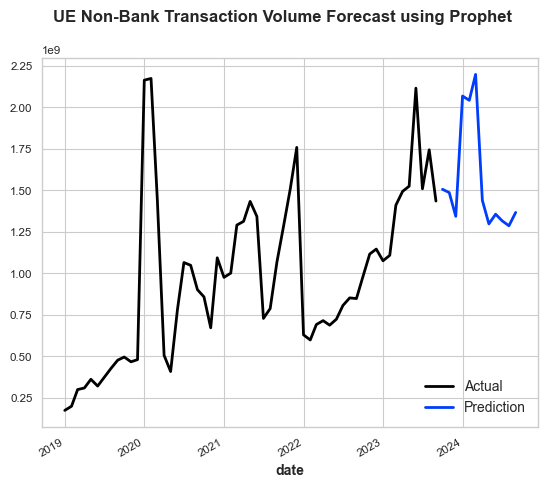

In [23]:
# Import pre-trained Prophet UE Non-Bank model from pickle file
ue_nonbank_vol_prophet = pickle.load(open(model_path + 'ue_nonbank_vol_prophet.pkl', 'rb'))

# Forecast UE Non-Bank transaction volume using Prophet model
pred_ue_nonbank_vol_prophet = pred_model(model=ue_nonbank_vol_prophet, len=forecast_horizon, train=ue_nonbank_vol)

# Plot the forecast result
plot_actual_pred(actual=ue_nonbank_vol, 
                 pred=pred_ue_nonbank_vol_prophet, 
                 suptitle='UE Non-Bank Transaction Volume Forecast using Prophet', 
)

In [24]:
# Create a DataFrame for UE Non-Bank transaction volume forecast result
ue_nonbank_vol_prophet = out_pred_df(model=ue_nonbank_vol_prophet, 
                                     len=forecast_horizon,
                                     train=ue_nonbank_vol,
                                     type_name='UE Non-Bank',
                                     model_name='Prophet',
                                     col_id='_vol'
)

# Show ue_nonbank_vol_prophet DataFrame
ue_nonbank_vol_prophet

  0%|          | 0/13 [00:00<?, ?it/s]

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol
0,2019-01-01,UE Non-Bank,Actual,1.731632e+08,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,UE Non-Bank,Actual,1.980435e+08,NaN,NaN,NaN,NaN,NaN,0.1437
2,2019-03-01,UE Non-Bank,Actual,2.985798e+08,NaN,NaN,NaN,NaN,NaN,0.5076
3,2019-04-01,UE Non-Bank,Actual,3.080419e+08,NaN,NaN,NaN,NaN,NaN,0.0317
4,2019-05-01,UE Non-Bank,Actual,3.604117e+08,NaN,NaN,NaN,NaN,NaN,0.1700
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,UE Non-Bank,Prophet,1.296479e+09,0.3,458624920.0,392930430.0,2.6,-0.0326,-0.0987
78,2024-06-01,UE Non-Bank,Prophet,1.354934e+09,0.3,458624920.0,392930430.0,2.6,0.0153,0.0451
79,2024-07-01,UE Non-Bank,Prophet,1.314946e+09,0.3,458624920.0,392930430.0,2.6,-0.0432,-0.0295
80,2024-08-01,UE Non-Bank,Prophet,1.285288e+09,0.3,458624920.0,392930430.0,2.6,-0.1066,-0.0226


#### | UE Non Bank Nom Prophet Forecast

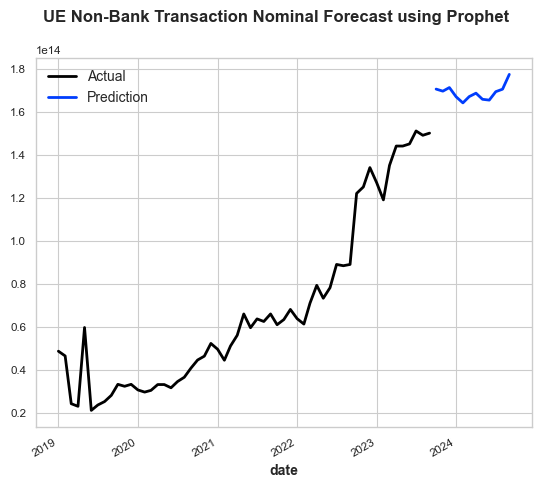

In [25]:
# Import pre-trained Prophet UE Non-Bank model from pickle file
ue_nonbank_nom_prophet = pickle.load(open(model_path + 'ue_nonbank_nom_prophet.pkl', 'rb'))

# Forecast UE Non-Bank transaction nominal using Prophet model
pred_ue_nonbank_nom_prophet = pred_model(model=ue_nonbank_nom_prophet, len=forecast_horizon, train=ue_nonbank_nom)

# Plot the forecast result
plot_actual_pred(actual=ue_nonbank_nom, 
                 pred=pred_ue_nonbank_nom_prophet, 
                 suptitle='UE Non-Bank Transaction Nominal Forecast using Prophet', 
)

In [26]:
# Create a DataFrame for UE Non-Bank transaction nominal forecast result
ue_nonbank_nom_prophet = out_pred_df(model=ue_nonbank_nom_prophet, 
                                     len=forecast_horizon,
                                     train=ue_nonbank_nom,
                                     type_name='UE Non-Bank',
                                     model_name='Prophet',
                                     col_id='_nom'
)

# Show ue_nonbank_nom_prophet DataFrame
ue_nonbank_nom_prophet

  0%|          | 0/13 [00:00<?, ?it/s]

component,date,type,model,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,UE Non-Bank,Actual,4.870000e+13,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,UE Non-Bank,Actual,4.650000e+13,NaN,NaN,NaN,NaN,NaN,-0.0452
2,2019-03-01,UE Non-Bank,Actual,2.430000e+13,NaN,NaN,NaN,NaN,NaN,-0.4774
3,2019-04-01,UE Non-Bank,Actual,2.310000e+13,NaN,NaN,NaN,NaN,NaN,-0.0494
4,2019-05-01,UE Non-Bank,Actual,5.970000e+13,NaN,NaN,NaN,NaN,NaN,1.5844
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,UE Non-Bank,Prophet,1.657157e+14,0.15,1.931513e+13,1.482568e+13,10.2,-0.0104,-0.0169
78,2024-06-01,UE Non-Bank,Prophet,1.653429e+14,0.15,1.931513e+13,1.482568e+13,10.2,0.1854,-0.0022
79,2024-07-01,UE Non-Bank,Prophet,1.692661e+14,0.15,1.931513e+13,1.482568e+13,10.2,0.1056,0.0237
80,2024-08-01,UE Non-Bank,Prophet,1.704117e+14,0.15,1.931513e+13,1.482568e+13,10.2,0.1194,0.0068


#### | UE Non Bank Vol & UE Non Bank Nom Prophet Forecast Merge

In [27]:
# Merge ue_nonbank_vol_prophet and ue_nonbank_nom_prophet DataFrames
ue_nonbank_prophet = pd.merge(ue_nonbank_vol_prophet, ue_nonbank_nom_prophet, on=['date', 'type', 'model'])

# Show ue_nonbank_prophet DataFrame
ue_nonbank_prophet

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,UE Non-Bank,Actual,1.731632e+08,NaN,NaN,NaN,NaN,NaN,NaN,4.870000e+13,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,UE Non-Bank,Actual,1.980435e+08,NaN,NaN,NaN,NaN,NaN,0.1437,4.650000e+13,NaN,NaN,NaN,NaN,NaN,-0.0452
2,2019-03-01,UE Non-Bank,Actual,2.985798e+08,NaN,NaN,NaN,NaN,NaN,0.5076,2.430000e+13,NaN,NaN,NaN,NaN,NaN,-0.4774
3,2019-04-01,UE Non-Bank,Actual,3.080419e+08,NaN,NaN,NaN,NaN,NaN,0.0317,2.310000e+13,NaN,NaN,NaN,NaN,NaN,-0.0494
4,2019-05-01,UE Non-Bank,Actual,3.604117e+08,NaN,NaN,NaN,NaN,NaN,0.1700,5.970000e+13,NaN,NaN,NaN,NaN,NaN,1.5844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,UE Non-Bank,Prophet,1.296479e+09,0.3,458624920.0,392930430.0,2.6,-0.0326,-0.0987,1.657157e+14,0.15,1.931513e+13,1.482568e+13,10.2,-0.0104,-0.0169
78,2024-06-01,UE Non-Bank,Prophet,1.354934e+09,0.3,458624920.0,392930430.0,2.6,0.0153,0.0451,1.653429e+14,0.15,1.931513e+13,1.482568e+13,10.2,0.1854,-0.0022
79,2024-07-01,UE Non-Bank,Prophet,1.314946e+09,0.3,458624920.0,392930430.0,2.6,-0.0432,-0.0295,1.692661e+14,0.15,1.931513e+13,1.482568e+13,10.2,0.1056,0.0237
80,2024-08-01,UE Non-Bank,Prophet,1.285288e+09,0.3,458624920.0,392930430.0,2.6,-0.1066,-0.0226,1.704117e+14,0.15,1.931513e+13,1.482568e+13,10.2,0.1194,0.0068


#### QRIS Volume Prophet Forecast

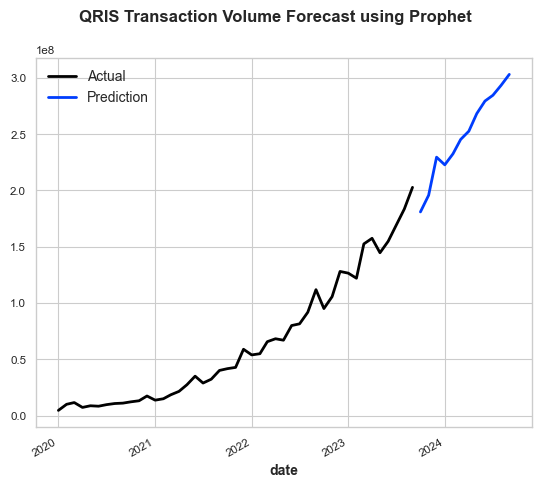

In [28]:
# Import pre-trained Prophet QRIS model from pickle file
qris_vol_prophet = pickle.load(open(model_path + 'qris_vol_prophet.pkl', 'rb'))

# Forecast QRIS transaction volume using Prophet model
pred_qris_vol_prophet = pred_model(model=qris_vol_prophet, len=forecast_horizon, train=qris_vol)

# Plot the forecast result
plot_actual_pred(actual=qris_vol, 
                 pred=pred_qris_vol_prophet, 
                 suptitle='QRIS Transaction Volume Forecast using Prophet', 
)

In [29]:
# Create a DataFrame for QRIS transaction volume forecast result
qris_vol_prophet = out_pred_df(model=qris_vol_prophet, 
                               len=forecast_horizon,
                               train=qris_vol,
                               type_name='QRIS',
                               model_name='Prophet',
                               col_id='_vol'
)

# Show qris_vol_prophet DataFrame
qris_vol_prophet

  0%|          | 0/10 [00:00<?, ?it/s]

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol
0,2020-01-01,QRIS,Actual,4.559188e+06,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-01,QRIS,Actual,9.965500e+06,NaN,NaN,NaN,NaN,NaN,1.1858
2,2020-03-01,QRIS,Actual,1.151187e+07,NaN,NaN,NaN,NaN,NaN,0.1552
3,2020-04-01,QRIS,Actual,7.200764e+06,NaN,NaN,NaN,NaN,NaN,-0.3745
4,2020-05-01,QRIS,Actual,8.664846e+06,NaN,NaN,NaN,NaN,NaN,0.2033
...,...,...,...,...,...,...,...,...,...,...
62,2024-05-01,QRIS,Prophet,2.682716e+08,0.11,16853974.0,13395080.0,9.1,0.8342,0.0619
63,2024-06-01,QRIS,Prophet,2.794242e+08,0.11,16853974.0,13395080.0,9.1,0.7282,0.0416
64,2024-07-01,QRIS,Prophet,2.845567e+08,0.11,16853974.0,13395080.0,9.1,0.8235,0.0184
65,2024-08-01,QRIS,Prophet,2.933906e+08,0.11,16853974.0,13395080.0,9.1,0.7067,0.0310


#### | QRIS Nom Prophet Forecast

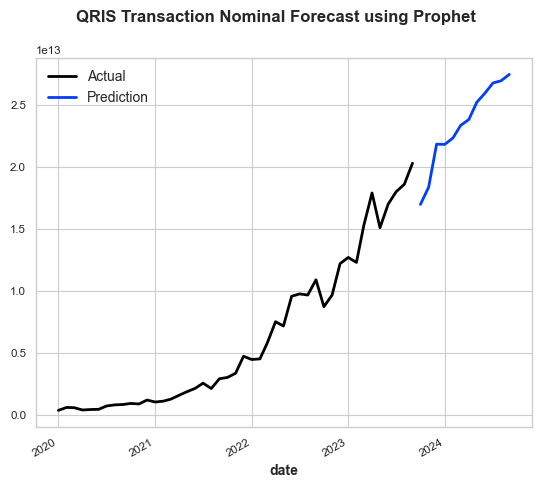

In [30]:
# Import pre-trained Prophet QRIS model from pickle file
qris_nom_prophet = pickle.load(open(model_path + 'qris_nom_prophet.pkl', 'rb'))

# Forecast QRIS transaction nominal using Prophet model
pred_qris_nom_prophet = pred_model(model=qris_nom_prophet, len=forecast_horizon, train=qris_nom)

# Plot the forecast result
plot_actual_pred(actual=qris_nom, 
                 pred=pred_qris_nom_prophet, 
                 suptitle='QRIS Transaction Nominal Forecast using Prophet', 
)

In [31]:
# Create a DataFrame for QRIS transaction nominal forecast result
qris_nom_prophet = out_pred_df(model=qris_nom_prophet, 
                               len=forecast_horizon,
                               train=qris_nom,
                               type_name='QRIS',
                               model_name='Prophet',
                               col_id='_nom'
)

# Show qris_nom_prophet DataFrame
qris_nom_prophet

  0%|          | 0/10 [00:00<?, ?it/s]

component,date,type,model,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2020-01-01,QRIS,Actual,3.650000e+11,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-01,QRIS,Actual,6.040000e+11,NaN,NaN,NaN,NaN,NaN,0.6548
2,2020-03-01,QRIS,Actual,5.810000e+11,NaN,NaN,NaN,NaN,NaN,-0.0381
3,2020-04-01,QRIS,Actual,3.970000e+11,NaN,NaN,NaN,NaN,NaN,-0.3167
4,2020-05-01,QRIS,Actual,4.340000e+11,NaN,NaN,NaN,NaN,NaN,0.0932
...,...,...,...,...,...,...,...,...,...,...
62,2024-05-01,QRIS,Prophet,2.521957e+13,0.19,3.014539e+12,2.277279e+12,15.9,1.0862,0.0585
63,2024-06-01,QRIS,Prophet,2.595449e+13,0.19,3.014539e+12,2.277279e+12,15.9,0.9010,0.0291
64,2024-07-01,QRIS,Prophet,2.677049e+13,0.19,3.014539e+12,2.277279e+12,15.9,0.5896,0.0314
65,2024-08-01,QRIS,Prophet,2.695426e+13,0.19,3.014539e+12,2.277279e+12,15.9,0.5672,0.0069


#### | QRIS Vol & QRIS Nom Prophet Forecast Merge

In [32]:
# Merge qris_vol_prophet and qris_nom_prophet DataFrames
qris_prophet = pd.merge(qris_vol_prophet, qris_nom_prophet, on=['date', 'type', 'model'])

# Show qris_prophet DataFrame
qris_prophet

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2020-01-01,QRIS,Actual,4.559188e+06,NaN,NaN,NaN,NaN,NaN,NaN,3.650000e+11,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-01,QRIS,Actual,9.965500e+06,NaN,NaN,NaN,NaN,NaN,1.1858,6.040000e+11,NaN,NaN,NaN,NaN,NaN,0.6548
2,2020-03-01,QRIS,Actual,1.151187e+07,NaN,NaN,NaN,NaN,NaN,0.1552,5.810000e+11,NaN,NaN,NaN,NaN,NaN,-0.0381
3,2020-04-01,QRIS,Actual,7.200764e+06,NaN,NaN,NaN,NaN,NaN,-0.3745,3.970000e+11,NaN,NaN,NaN,NaN,NaN,-0.3167
4,2020-05-01,QRIS,Actual,8.664846e+06,NaN,NaN,NaN,NaN,NaN,0.2033,4.340000e+11,NaN,NaN,NaN,NaN,NaN,0.0932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2024-05-01,QRIS,Prophet,2.682716e+08,0.11,16853974.0,13395080.0,9.1,0.8342,0.0619,2.521957e+13,0.19,3.014539e+12,2.277279e+12,15.9,1.0862,0.0585
63,2024-06-01,QRIS,Prophet,2.794242e+08,0.11,16853974.0,13395080.0,9.1,0.7282,0.0416,2.595449e+13,0.19,3.014539e+12,2.277279e+12,15.9,0.9010,0.0291
64,2024-07-01,QRIS,Prophet,2.845567e+08,0.11,16853974.0,13395080.0,9.1,0.8235,0.0184,2.677049e+13,0.19,3.014539e+12,2.277279e+12,15.9,0.5896,0.0314
65,2024-08-01,QRIS,Prophet,2.933906e+08,0.11,16853974.0,13395080.0,9.1,0.7067,0.0310,2.695426e+13,0.19,3.014539e+12,2.277279e+12,15.9,0.5672,0.0069


#### | Digital Banking Vol Prophet Forecast

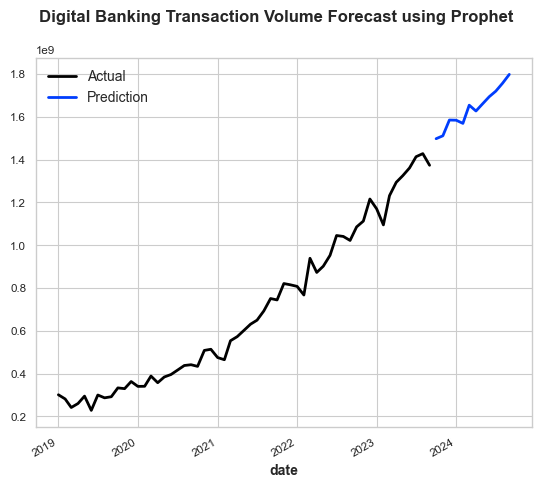

In [33]:
# Import pre-trained Prophet Digital Banking model from pickle file
digital_banking_vol_prophet = pickle.load(open(model_path + 'digital_banking_vol_prophet.pkl', 'rb'))

# Forecast Digital Banking transaction volume using Prophet model
pred_digital_banking_vol_prophet = pred_model(model=digital_banking_vol_prophet, len=forecast_horizon, train=digital_banking_vol)

# Plot the forecast result
plot_actual_pred(actual=digital_banking_vol, 
                 pred=pred_digital_banking_vol_prophet, 
                 suptitle='Digital Banking Transaction Volume Forecast using Prophet', 
)

In [34]:
# Create a DataFrame for Digital Banking transaction volume forecast result
digital_banking_vol_prophet = out_pred_df(model=digital_banking_vol_prophet, 
                                          len=forecast_horizon,
                                          train=digital_banking_vol,
                                          type_name='Digital Banking',
                                          model_name='Prophet',
                                          col_id='_vol'
)

# Show digital_banking_vol_prophet DataFrame
digital_banking_vol_prophet

  0%|          | 0/13 [00:00<?, ?it/s]

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol
0,2019-01-01,Digital Banking,Actual,3.010860e+08,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Digital Banking,Actual,2.815659e+08,NaN,NaN,NaN,NaN,NaN,-0.0648
2,2019-03-01,Digital Banking,Actual,2.415977e+08,NaN,NaN,NaN,NaN,NaN,-0.1419
3,2019-04-01,Digital Banking,Actual,2.602234e+08,NaN,NaN,NaN,NaN,NaN,0.0771
4,2019-05-01,Digital Banking,Actual,2.947539e+08,NaN,NaN,NaN,NaN,NaN,0.1327
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Digital Banking,Prophet,1.660450e+09,0.04,62079454.0,51843225.0,3.4,0.2880,0.0204
78,2024-06-01,Digital Banking,Prophet,1.694174e+09,0.04,62079454.0,51843225.0,3.4,0.3104,0.0203
79,2024-07-01,Digital Banking,Prophet,1.720073e+09,0.04,62079454.0,51843225.0,3.4,0.2175,0.0153
80,2024-08-01,Digital Banking,Prophet,1.757046e+09,0.04,62079454.0,51843225.0,3.4,0.2374,0.0215


#### | Digital Banking Nom Prophet Forecast

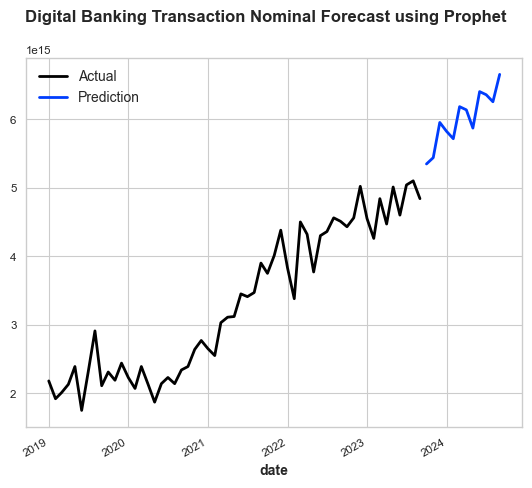

In [35]:
# Import pre-trained Prophet Digital Banking model from pickle file
digital_banking_nom_prophet = pickle.load(open(model_path + 'digital_banking_nom_prophet.pkl', 'rb'))

# Forecast Digital Banking transaction nominal using Prophet model
pred_digital_banking_nom_prophet = pred_model(model=digital_banking_nom_prophet, len=forecast_horizon, train=digital_banking_nom)

# Plot the forecast result
plot_actual_pred(actual=digital_banking_nom, 
                 pred=pred_digital_banking_nom_prophet, 
                 suptitle='Digital Banking Transaction Nominal Forecast using Prophet', 
)

In [36]:
# Create a DataFrame for Digital Banking transaction nominal forecast result
digital_banking_nom_prophet = out_pred_df(model=digital_banking_nom_prophet, 
                                          len=forecast_horizon,
                                          train=digital_banking_nom,
                                          type_name='Digital Banking',
                                          model_name='Prophet',
                                          col_id='_nom'
)

# Show digital_banking_nom_prophet DataFrame
digital_banking_nom_prophet

  0%|          | 0/13 [00:00<?, ?it/s]

component,date,type,model,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,Digital Banking,Actual,2.180000e+15,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Digital Banking,Actual,1.920000e+15,NaN,NaN,NaN,NaN,NaN,-0.1193
2,2019-03-01,Digital Banking,Actual,2.010000e+15,NaN,NaN,NaN,NaN,NaN,0.0469
3,2019-04-01,Digital Banking,Actual,2.130000e+15,NaN,NaN,NaN,NaN,NaN,0.0597
4,2019-05-01,Digital Banking,Actual,2.390000e+15,NaN,NaN,NaN,NaN,NaN,0.1221
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Digital Banking,Prophet,5.869818e+15,0.05,2.979856e+14,2.397183e+14,16.1,0.2087,-0.0434
78,2024-06-01,Digital Banking,Prophet,6.402313e+15,0.05,2.979856e+14,2.397183e+14,16.1,0.3808,0.0907
79,2024-07-01,Digital Banking,Prophet,6.357022e+15,0.05,2.979856e+14,2.397183e+14,16.1,0.2409,-0.0071
80,2024-08-01,Digital Banking,Prophet,6.254337e+15,0.05,2.979856e+14,2.397183e+14,16.1,0.0887,-0.0162


#### | Digital Banking Vol & Digital Banking Nom Prophet Forecast Merge

In [37]:
# Merge digital_banking_vol_prophet and digital_banking_nom_prophet DataFrames
digital_banking_prophet = pd.merge(digital_banking_vol_prophet, digital_banking_nom_prophet, on=['date', 'type', 'model'])

# Show digital_banking_prophet DataFrame
digital_banking_prophet

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,Digital Banking,Actual,3.010860e+08,NaN,NaN,NaN,NaN,NaN,NaN,2.180000e+15,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Digital Banking,Actual,2.815659e+08,NaN,NaN,NaN,NaN,NaN,-0.0648,1.920000e+15,NaN,NaN,NaN,NaN,NaN,-0.1193
2,2019-03-01,Digital Banking,Actual,2.415977e+08,NaN,NaN,NaN,NaN,NaN,-0.1419,2.010000e+15,NaN,NaN,NaN,NaN,NaN,0.0469
3,2019-04-01,Digital Banking,Actual,2.602234e+08,NaN,NaN,NaN,NaN,NaN,0.0771,2.130000e+15,NaN,NaN,NaN,NaN,NaN,0.0597
4,2019-05-01,Digital Banking,Actual,2.947539e+08,NaN,NaN,NaN,NaN,NaN,0.1327,2.390000e+15,NaN,NaN,NaN,NaN,NaN,0.1221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Digital Banking,Prophet,1.660450e+09,0.04,62079454.0,51843225.0,3.4,0.2880,0.0204,5.869818e+15,0.05,2.979856e+14,2.397183e+14,16.1,0.2087,-0.0434
78,2024-06-01,Digital Banking,Prophet,1.694174e+09,0.04,62079454.0,51843225.0,3.4,0.3104,0.0203,6.402313e+15,0.05,2.979856e+14,2.397183e+14,16.1,0.3808,0.0907
79,2024-07-01,Digital Banking,Prophet,1.720073e+09,0.04,62079454.0,51843225.0,3.4,0.2175,0.0153,6.357022e+15,0.05,2.979856e+14,2.397183e+14,16.1,0.2409,-0.0071
80,2024-08-01,Digital Banking,Prophet,1.757046e+09,0.04,62079454.0,51843225.0,3.4,0.2374,0.0215,6.254337e+15,0.05,2.979856e+14,2.397183e+14,16.1,0.0887,-0.0162


### | Auto-ARIMA

#### | Debit Vol Auto-ARIMA Forecast

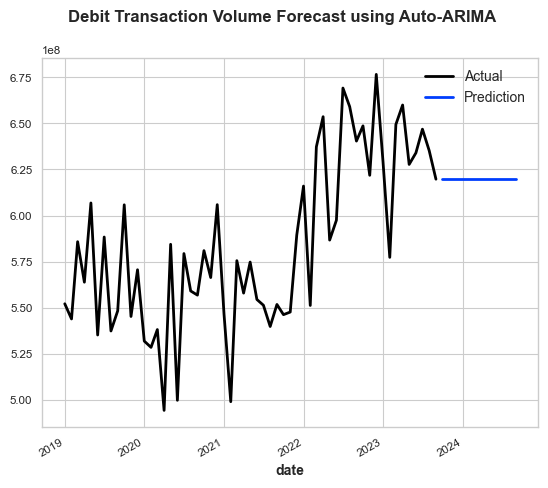

In [38]:
# Import pre-trained Auto-ARIMA model from pickle file
debit_vol_autoarima = pickle.load(open(model_path + 'debit_vol_autoarima.pkl', 'rb'))

# Forecast debit transaction volume using Auto-ARIMA model
pred_debit_vol_autoarima = pred_model(model=debit_vol_autoarima, len=forecast_horizon, train=debit_vol)

# Plot the forecast result
plot_actual_pred(actual=debit_vol, 
                 pred=pred_debit_vol_autoarima, 
                 suptitle='Debit Transaction Volume Forecast using Auto-ARIMA', 
)

In [39]:
# Create a DataFrame for debit transaction volume forecast result
debit_vol_autoarima = out_pred_df(model=debit_vol_autoarima, 
                                  len=forecast_horizon,
                                  train=debit_vol,
                                  type_name='Debit',
                                  model_name='Auto-ARIMA',
                                  col_id='_vol'
)

# Show debit_vol_autoarima DataFrame
debit_vol_autoarima

  0%|          | 0/13 [00:00<?, ?it/s]

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol
0,2019-01-01,Debit,Actual,552184496.5,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Debit,Actual,543953278.0,NaN,NaN,NaN,NaN,NaN,-0.0149
2,2019-03-01,Debit,Actual,585842408.7,NaN,NaN,NaN,NaN,NaN,0.0770
3,2019-04-01,Debit,Actual,563882230.9,NaN,NaN,NaN,NaN,NaN,-0.0375
4,2019-05-01,Debit,Actual,606845341.1,NaN,NaN,NaN,NaN,NaN,0.0762
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Debit,Auto-ARIMA,619731477.0,0.05,35061761.0,28360405.0,9.6,-0.0610,0.0000
78,2024-06-01,Debit,Auto-ARIMA,619731477.0,0.05,35061761.0,28360405.0,9.6,-0.0128,0.0000
79,2024-07-01,Debit,Auto-ARIMA,619731477.0,0.05,35061761.0,28360405.0,9.6,-0.0225,0.0000
80,2024-08-01,Debit,Auto-ARIMA,619731477.0,0.05,35061761.0,28360405.0,9.6,-0.0419,0.0000


#### | Debit Nom Auto-ARIMA Forecast

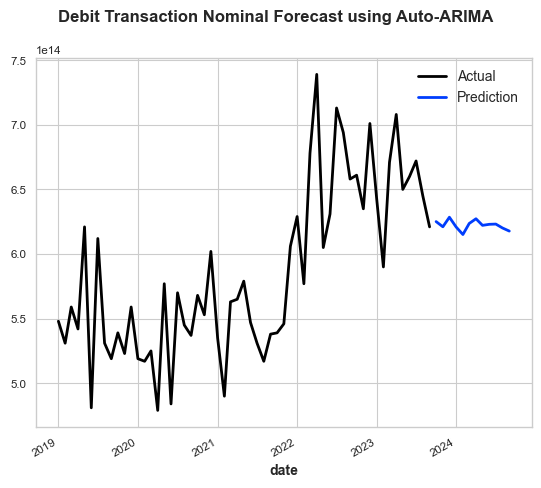

In [40]:
# Import pre-trained Auto-ARIMA model from pickle file
debit_nom_autoarima = pickle.load(open(model_path + 'debit_nom_autoarima.pkl', 'rb'))

# Forecast debit transaction nominal using Auto-ARIMA model
pred_debit_nom_autoarima = pred_model(model=debit_nom_autoarima, len=forecast_horizon, train=debit_nom)

# Plot the forecast result
plot_actual_pred(actual=debit_nom, 
                 pred=pred_debit_nom_autoarima, 
                 suptitle='Debit Transaction Nominal Forecast using Auto-ARIMA', 
)

In [41]:
# Create a DataFrame for debit transaction nominal forecast result
debit_nom_autoarima = out_pred_df(model=debit_nom_autoarima, 
                                  len=forecast_horizon,
                                  train=debit_nom,
                                  type_name='Debit',
                                  model_name='Auto-ARIMA',
                                  col_id='_nom'
)

# Show debit_nom_autoarima DataFrame
debit_nom_autoarima

  0%|          | 0/13 [00:00<?, ?it/s]

component,date,type,model,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,Debit,Actual,5.480000e+14,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Debit,Actual,5.310000e+14,NaN,NaN,NaN,NaN,NaN,-0.0310
2,2019-03-01,Debit,Actual,5.590000e+14,NaN,NaN,NaN,NaN,NaN,0.0527
3,2019-04-01,Debit,Actual,5.420000e+14,NaN,NaN,NaN,NaN,NaN,-0.0304
4,2019-05-01,Debit,Actual,6.210000e+14,NaN,NaN,NaN,NaN,NaN,0.1458
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Debit,Auto-ARIMA,6.221850e+14,0.06,4.320931e+13,3.731482e+13,2.4,-0.1118,-0.0081
78,2024-06-01,Debit,Auto-ARIMA,6.229788e+14,0.06,4.320931e+13,3.731482e+13,2.4,-0.0590,0.0013
79,2024-07-01,Debit,Auto-ARIMA,6.231709e+14,0.06,4.320931e+13,3.731482e+13,2.4,-0.0528,0.0003
80,2024-08-01,Debit,Auto-ARIMA,6.201207e+14,0.06,4.320931e+13,3.731482e+13,2.4,-0.0738,-0.0049


#### | Debit Vol & Debit Nom Auto-ARIMA Forecast Merge

In [42]:
# Merge debit_vol_autoarima and debit_nom_autoarima DataFrames
debit_autoarima = pd.merge(debit_vol_autoarima, debit_nom_autoarima, on=['date', 'type', 'model'])

# Show debit_autoarima DataFrame
debit_autoarima

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,Debit,Actual,552184496.5,NaN,NaN,NaN,NaN,NaN,NaN,5.480000e+14,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Debit,Actual,543953278.0,NaN,NaN,NaN,NaN,NaN,-0.0149,5.310000e+14,NaN,NaN,NaN,NaN,NaN,-0.0310
2,2019-03-01,Debit,Actual,585842408.7,NaN,NaN,NaN,NaN,NaN,0.0770,5.590000e+14,NaN,NaN,NaN,NaN,NaN,0.0527
3,2019-04-01,Debit,Actual,563882230.9,NaN,NaN,NaN,NaN,NaN,-0.0375,5.420000e+14,NaN,NaN,NaN,NaN,NaN,-0.0304
4,2019-05-01,Debit,Actual,606845341.1,NaN,NaN,NaN,NaN,NaN,0.0762,6.210000e+14,NaN,NaN,NaN,NaN,NaN,0.1458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Debit,Auto-ARIMA,619731477.0,0.05,35061761.0,28360405.0,9.6,-0.0610,0.0000,6.221850e+14,0.06,4.320931e+13,3.731482e+13,2.4,-0.1118,-0.0081
78,2024-06-01,Debit,Auto-ARIMA,619731477.0,0.05,35061761.0,28360405.0,9.6,-0.0128,0.0000,6.229788e+14,0.06,4.320931e+13,3.731482e+13,2.4,-0.0590,0.0013
79,2024-07-01,Debit,Auto-ARIMA,619731477.0,0.05,35061761.0,28360405.0,9.6,-0.0225,0.0000,6.231709e+14,0.06,4.320931e+13,3.731482e+13,2.4,-0.0528,0.0003
80,2024-08-01,Debit,Auto-ARIMA,619731477.0,0.05,35061761.0,28360405.0,9.6,-0.0419,0.0000,6.201207e+14,0.06,4.320931e+13,3.731482e+13,2.4,-0.0738,-0.0049


#### | Credit Vol Auto-ARIMA Forecast

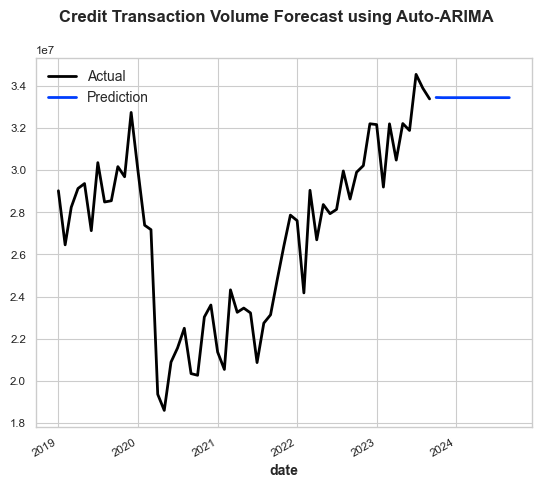

In [43]:
# Import pre-trained Auto-ARIMA model from pickle file
credit_vol_autoarima = pickle.load(open(model_path + 'credit_vol_autoarima.pkl', 'rb'))

# Forecast credit transaction volume using Auto-ARIMA model
pred_credit_vol_autoarima = pred_model(model=credit_vol_autoarima, len=forecast_horizon, train=credit_vol)

# Plot the forecast result
plot_actual_pred(actual=credit_vol, 
                 pred=pred_credit_vol_autoarima, 
                 suptitle='Credit Transaction Volume Forecast using Auto-ARIMA', 
)

In [44]:
# Create a DataFrame for credit transaction volume forecast result
credit_vol_autoarima = out_pred_df(model=credit_vol_autoarima, 
                                   len=forecast_horizon,
                                   train=credit_vol,
                                   type_name='Credit',
                                   model_name='Auto-ARIMA',
                                   col_id='_vol'
)

# Show credit_vol_autoarima DataFrame
credit_vol_autoarima

  0%|          | 0/13 [00:00<?, ?it/s]

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol
0,2019-01-01,Credit,Actual,2.901256e+07,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Credit,Actual,2.644951e+07,NaN,NaN,NaN,NaN,NaN,-0.0883
2,2019-03-01,Credit,Actual,2.823013e+07,NaN,NaN,NaN,NaN,NaN,0.0673
3,2019-04-01,Credit,Actual,2.912024e+07,NaN,NaN,NaN,NaN,NaN,0.0315
4,2019-05-01,Credit,Actual,2.935492e+07,NaN,NaN,NaN,NaN,NaN,0.0081
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Credit,Auto-ARIMA,3.342670e+07,0.05,1729146.0,1410231.0,9.4,0.1008,-0.0000
78,2024-06-01,Credit,Auto-ARIMA,3.342670e+07,0.05,1729146.0,1410231.0,9.4,0.0703,0.0000
79,2024-07-01,Credit,Auto-ARIMA,3.342670e+07,0.05,1729146.0,1410231.0,9.4,0.0736,-0.0000
80,2024-08-01,Credit,Auto-ARIMA,3.342670e+07,0.05,1729146.0,1410231.0,9.4,-0.0158,0.0000


#### | Credit Nom Auto-ARIMA Forecast

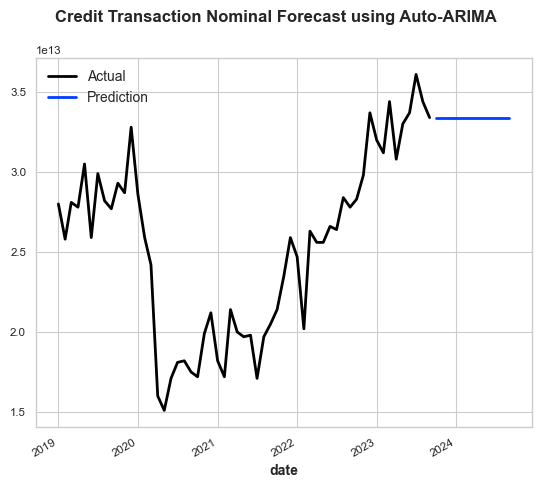

In [45]:
# Import pre-trained Auto-ARIMA model from pickle file
credit_nom_autoarima = pickle.load(open(model_path + 'credit_nom_autoarima.pkl', 'rb'))

# Forecast credit transaction nominal using Auto-ARIMA model
pred_credit_nom_autoarima = pred_model(model=credit_nom_autoarima, len=forecast_horizon, train=credit_nom)

# Plot the forecast result
plot_actual_pred(actual=credit_nom, 
                 pred=pred_credit_nom_autoarima, 
                 suptitle='Credit Transaction Nominal Forecast using Auto-ARIMA', 
)

In [46]:
# Create a DataFrame for credit transaction nominal forecast result
credit_nom_autoarima = out_pred_df(model=credit_nom_autoarima, 
                                   len=forecast_horizon,
                                   train=credit_nom,
                                   type_name='Credit',
                                   model_name='Auto-ARIMA',
                                   col_id='_nom'
)

# Show credit_nom_autoarima DataFrame
credit_nom_autoarima

  0%|          | 0/13 [00:00<?, ?it/s]

component,date,type,model,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,Credit,Actual,2.800000e+13,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Credit,Actual,2.580000e+13,NaN,NaN,NaN,NaN,NaN,-0.0786
2,2019-03-01,Credit,Actual,2.810000e+13,NaN,NaN,NaN,NaN,NaN,0.0891
3,2019-04-01,Credit,Actual,2.780000e+13,NaN,NaN,NaN,NaN,NaN,-0.0107
4,2019-05-01,Credit,Actual,3.050000e+13,NaN,NaN,NaN,NaN,NaN,0.0971
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Credit,Auto-ARIMA,3.340000e+13,0.06,2.065563e+12,1.753370e+12,11.5,0.1050,0.0000
78,2024-06-01,Credit,Auto-ARIMA,3.340000e+13,0.06,2.065563e+12,1.753370e+12,11.5,0.0190,0.0000
79,2024-07-01,Credit,Auto-ARIMA,3.340000e+13,0.06,2.065563e+12,1.753370e+12,11.5,0.0202,0.0000
80,2024-08-01,Credit,Auto-ARIMA,3.340000e+13,0.06,2.065563e+12,1.753370e+12,11.5,-0.0657,0.0000


#### | Credit Vol & Credit Nom Auto-ARIMA Forecast Merge

In [47]:
# Merge credit_vol_autoarima and credit_nom_autoarima DataFrames
credit_autoarima = pd.merge(credit_vol_autoarima, credit_nom_autoarima, on=['date', 'type', 'model'])

# Show credit_autoarima DataFrame
credit_autoarima

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,Credit,Actual,2.901256e+07,NaN,NaN,NaN,NaN,NaN,NaN,2.800000e+13,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Credit,Actual,2.644951e+07,NaN,NaN,NaN,NaN,NaN,-0.0883,2.580000e+13,NaN,NaN,NaN,NaN,NaN,-0.0786
2,2019-03-01,Credit,Actual,2.823013e+07,NaN,NaN,NaN,NaN,NaN,0.0673,2.810000e+13,NaN,NaN,NaN,NaN,NaN,0.0891
3,2019-04-01,Credit,Actual,2.912024e+07,NaN,NaN,NaN,NaN,NaN,0.0315,2.780000e+13,NaN,NaN,NaN,NaN,NaN,-0.0107
4,2019-05-01,Credit,Actual,2.935492e+07,NaN,NaN,NaN,NaN,NaN,0.0081,3.050000e+13,NaN,NaN,NaN,NaN,NaN,0.0971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Credit,Auto-ARIMA,3.342670e+07,0.05,1729146.0,1410231.0,9.4,0.1008,-0.0000,3.340000e+13,0.06,2.065563e+12,1.753370e+12,11.5,0.1050,0.0000
78,2024-06-01,Credit,Auto-ARIMA,3.342670e+07,0.05,1729146.0,1410231.0,9.4,0.0703,0.0000,3.340000e+13,0.06,2.065563e+12,1.753370e+12,11.5,0.0190,0.0000
79,2024-07-01,Credit,Auto-ARIMA,3.342670e+07,0.05,1729146.0,1410231.0,9.4,0.0736,-0.0000,3.340000e+13,0.06,2.065563e+12,1.753370e+12,11.5,0.0202,0.0000
80,2024-08-01,Credit,Auto-ARIMA,3.342670e+07,0.05,1729146.0,1410231.0,9.4,-0.0158,0.0000,3.340000e+13,0.06,2.065563e+12,1.753370e+12,11.5,-0.0657,0.0000


#### | UE Bank Vol Auto-ARIMA Forecast

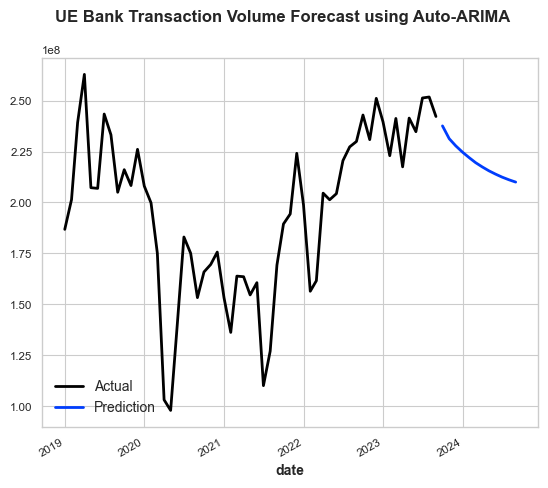

In [48]:
# Import pre-trained Auto-ARIMA model from pickle file
ue_bank_vol_autoarima = pickle.load(open(model_path + 'ue_bank_vol_autoarima.pkl', 'rb'))

# Forecast UE Bank transaction volume using Auto-ARIMA model
pred_ue_bank_vol_autoarima = pred_model(model=ue_bank_vol_autoarima, len=forecast_horizon, train=ue_bank_vol)

# Plot the forecast result
plot_actual_pred(actual=ue_bank_vol, 
                 pred=pred_ue_bank_vol_autoarima, 
                 suptitle='UE Bank Transaction Volume Forecast using Auto-ARIMA', 
)

In [49]:
# Create a DataFrame for UE Bank transaction volume forecast result
ue_bank_vol_autoarima = out_pred_df(model=ue_bank_vol_autoarima, 
                                    len=forecast_horizon,
                                    train=ue_bank_vol,
                                    type_name='UE Bank',
                                    model_name='Auto-ARIMA',
                                    col_id='_vol'
)

# Show ue_bank_vol_autoarima DataFrame
ue_bank_vol_autoarima

  0%|          | 0/13 [00:00<?, ?it/s]

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol
0,2019-01-01,UE Bank,Actual,1.868224e+08,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,UE Bank,Actual,2.013995e+08,NaN,NaN,NaN,NaN,NaN,0.0780
2,2019-03-01,UE Bank,Actual,2.392136e+08,NaN,NaN,NaN,NaN,NaN,0.1878
3,2019-04-01,UE Bank,Actual,2.628318e+08,NaN,NaN,NaN,NaN,NaN,0.0987
4,2019-05-01,UE Bank,Actual,2.072598e+08,NaN,NaN,NaN,NaN,NaN,-0.2114
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,UE Bank,Auto-ARIMA,2.155452e+08,0.08,21770913.0,17689374.0,11.8,0.0592,-0.0086
78,2024-06-01,UE Bank,Auto-ARIMA,2.138913e+08,0.08,21770913.0,17689374.0,11.8,-0.1330,-0.0077
79,2024-07-01,UE Bank,Auto-ARIMA,2.124320e+08,0.08,21770913.0,17689374.0,11.8,-0.0175,-0.0068
80,2024-08-01,UE Bank,Auto-ARIMA,2.111445e+08,0.08,21770913.0,17689374.0,11.8,-0.1583,-0.0061


#### | UE Bank Nom Auto-ARIMA Forecast

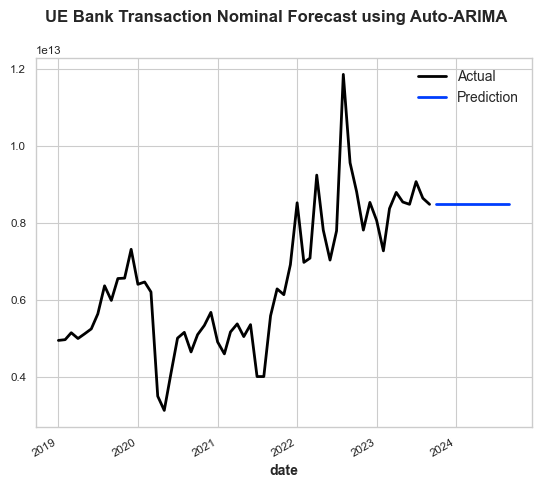

In [50]:
# Import pre-trained Auto-ARIMA model from pickle file
ue_bank_nom_autoarima = pickle.load(open(model_path + 'ue_bank_nom_autoarima.pkl', 'rb'))

# Forecast UE Bank transaction nominal using Auto-ARIMA model
pred_ue_bank_nom_autoarima = pred_model(model=ue_bank_nom_autoarima, len=forecast_horizon, train=ue_bank_nom)

# Plot the forecast result
plot_actual_pred(actual=ue_bank_nom, 
                 pred=pred_ue_bank_nom_autoarima, 
                 suptitle='UE Bank Transaction Nominal Forecast using Auto-ARIMA', 
)

In [51]:
# Create a DataFrame for UE Bank transaction nominal forecast result
ue_bank_nom_autoarima = out_pred_df(model=ue_bank_nom_autoarima, 
                                    len=forecast_horizon,
                                    train=ue_bank_nom,
                                    type_name='UE Bank',
                                    model_name='Auto-ARIMA',
                                    col_id='_nom'
)

# Show ue_bank_nom_autoarima DataFrame
ue_bank_nom_autoarima

  0%|          | 0/13 [00:00<?, ?it/s]

component,date,type,model,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,UE Bank,Actual,4.940000e+12,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,UE Bank,Actual,4.960000e+12,NaN,NaN,NaN,NaN,NaN,0.0040
2,2019-03-01,UE Bank,Actual,5.140000e+12,NaN,NaN,NaN,NaN,NaN,0.0363
3,2019-04-01,UE Bank,Actual,4.990000e+12,NaN,NaN,NaN,NaN,NaN,-0.0292
4,2019-05-01,UE Bank,Actual,5.110000e+12,NaN,NaN,NaN,NaN,NaN,0.0240
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,UE Bank,Auto-ARIMA,8.480000e+12,0.08,8.869568e+11,6.953846e+11,4.8,-0.0353,0.0000
78,2024-06-01,UE Bank,Auto-ARIMA,8.480000e+12,0.08,8.869568e+11,6.953846e+11,4.8,-0.0070,0.0000
79,2024-07-01,UE Bank,Auto-ARIMA,8.480000e+12,0.08,8.869568e+11,6.953846e+11,4.8,0.0000,0.0000
80,2024-08-01,UE Bank,Auto-ARIMA,8.480000e+12,0.08,8.869568e+11,6.953846e+11,4.8,-0.0650,0.0000


#### | UE Bank Vol & UE Bank Nom Forecast Merge

In [52]:
# Merge ue_bank_vol_autoarima and ue_bank_nom_autoarima DataFrames
ue_bank_autoarima = pd.merge(ue_bank_vol_autoarima, ue_bank_nom_autoarima, on=['date', 'type', 'model'])

# Show ue_bank_autoarima DataFrame
ue_bank_autoarima

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,UE Bank,Actual,1.868224e+08,NaN,NaN,NaN,NaN,NaN,NaN,4.940000e+12,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,UE Bank,Actual,2.013995e+08,NaN,NaN,NaN,NaN,NaN,0.0780,4.960000e+12,NaN,NaN,NaN,NaN,NaN,0.0040
2,2019-03-01,UE Bank,Actual,2.392136e+08,NaN,NaN,NaN,NaN,NaN,0.1878,5.140000e+12,NaN,NaN,NaN,NaN,NaN,0.0363
3,2019-04-01,UE Bank,Actual,2.628318e+08,NaN,NaN,NaN,NaN,NaN,0.0987,4.990000e+12,NaN,NaN,NaN,NaN,NaN,-0.0292
4,2019-05-01,UE Bank,Actual,2.072598e+08,NaN,NaN,NaN,NaN,NaN,-0.2114,5.110000e+12,NaN,NaN,NaN,NaN,NaN,0.0240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,UE Bank,Auto-ARIMA,2.155452e+08,0.08,21770913.0,17689374.0,11.8,0.0592,-0.0086,8.480000e+12,0.08,8.869568e+11,6.953846e+11,4.8,-0.0353,0.0000
78,2024-06-01,UE Bank,Auto-ARIMA,2.138913e+08,0.08,21770913.0,17689374.0,11.8,-0.1330,-0.0077,8.480000e+12,0.08,8.869568e+11,6.953846e+11,4.8,-0.0070,0.0000
79,2024-07-01,UE Bank,Auto-ARIMA,2.124320e+08,0.08,21770913.0,17689374.0,11.8,-0.0175,-0.0068,8.480000e+12,0.08,8.869568e+11,6.953846e+11,4.8,0.0000,0.0000
80,2024-08-01,UE Bank,Auto-ARIMA,2.111445e+08,0.08,21770913.0,17689374.0,11.8,-0.1583,-0.0061,8.480000e+12,0.08,8.869568e+11,6.953846e+11,4.8,-0.0650,0.0000


#### | UE Non Bank Vol Prophet Forecast

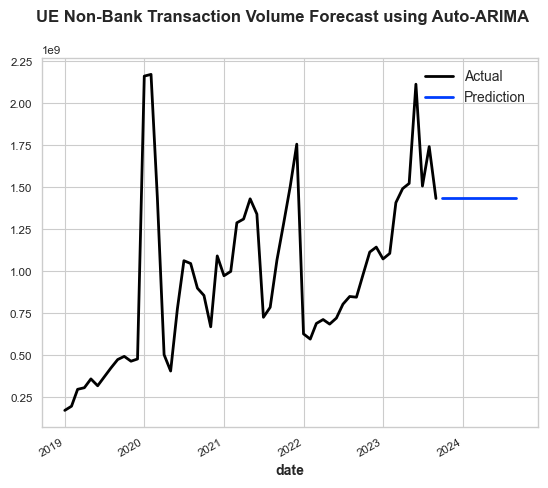

In [53]:
# Import pre-trained Auto-ARIMA model from pickle file
ue_nonbank_vol_autoarima = pickle.load(open(model_path + 'ue_nonbank_vol_autoarima.pkl', 'rb'))

# Forecast UE Non-Bank transaction volume using Auto-ARIMA model
pred_ue_nonbank_vol_autoarima = pred_model(model=ue_nonbank_vol_autoarima, len=forecast_horizon, train=ue_nonbank_vol)

# Plot the forecast result
plot_actual_pred(actual=ue_nonbank_vol, 
                 pred=pred_ue_nonbank_vol_autoarima, 
                 suptitle='UE Non-Bank Transaction Volume Forecast using Auto-ARIMA', 
)

In [54]:
# Create a DataFrame for UE Non-Bank transaction volume forecast result
ue_nonbank_vol_autoarima = out_pred_df(model=ue_nonbank_vol_autoarima, 
                                       len=forecast_horizon,
                                       train=ue_nonbank_vol,
                                       type_name='UE Non-Bank',
                                       model_name='Auto-ARIMA',
                                       col_id='_vol'
)

# Show ue_nonbank_vol_autoarima DataFrame
ue_nonbank_vol_autoarima

  0%|          | 0/13 [00:00<?, ?it/s]

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol
0,2019-01-01,UE Non-Bank,Actual,1.731632e+08,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,UE Non-Bank,Actual,1.980435e+08,NaN,NaN,NaN,NaN,NaN,0.1437
2,2019-03-01,UE Non-Bank,Actual,2.985798e+08,NaN,NaN,NaN,NaN,NaN,0.5076
3,2019-04-01,UE Non-Bank,Actual,3.080419e+08,NaN,NaN,NaN,NaN,NaN,0.0317
4,2019-05-01,UE Non-Bank,Actual,3.604117e+08,NaN,NaN,NaN,NaN,NaN,0.1700
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,UE Non-Bank,Auto-ARIMA,1.434049e+09,0.23,348377263.0,285182703.0,9.6,0.1765,0.0000
78,2024-06-01,UE Non-Bank,Auto-ARIMA,1.434049e+09,0.23,348377263.0,285182703.0,9.6,0.0244,0.0000
79,2024-07-01,UE Non-Bank,Auto-ARIMA,1.434049e+09,0.23,348377263.0,285182703.0,9.6,-0.3217,0.0000
80,2024-08-01,UE Non-Bank,Auto-ARIMA,1.434049e+09,0.23,348377263.0,285182703.0,9.6,-0.0490,0.0000


#### | UE Non Bank Nom Auto-ARIMA Forecast

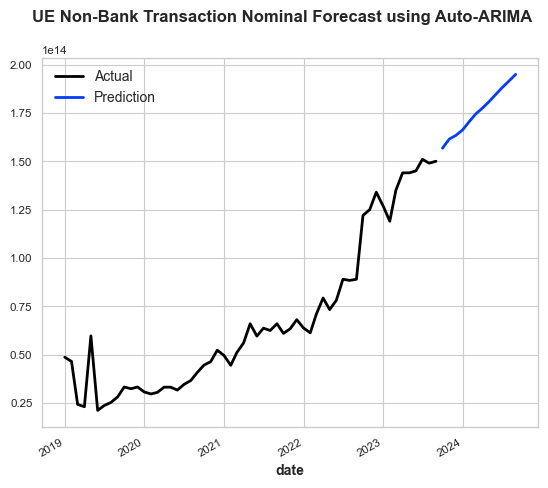

In [55]:
# Import pre-trained Auto-ARIMA model from pickle file
ue_nonbank_nom_autoarima = pickle.load(open(model_path + 'ue_nonbank_nom_autoarima.pkl', 'rb'))

# Forecast UE Non-Bank transaction nominal using Auto-ARIMA model
pred_ue_nonbank_nom_autoarima = pred_model(model=ue_nonbank_nom_autoarima, len=forecast_horizon, train=ue_nonbank_nom)

# Plot the forecast result
plot_actual_pred(actual=ue_nonbank_nom, 
                 pred=pred_ue_nonbank_nom_autoarima, 
                 suptitle='UE Non-Bank Transaction Nominal Forecast using Auto-ARIMA', 
)

In [56]:
# Create a DataFrame for UE Non-Bank transaction nominal forecast result
ue_nonbank_nom_autoarima = out_pred_df(model=ue_nonbank_nom_autoarima, 
                                       len=forecast_horizon,
                                       train=ue_nonbank_nom,
                                       type_name='UE Non-Bank',
                                       model_name='Auto-ARIMA',
                                       col_id='_nom'
)

# Show ue_nonbank_nom_autoarima DataFrame
ue_nonbank_nom_autoarima

  0%|          | 0/13 [00:00<?, ?it/s]

component,date,type,model,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,UE Non-Bank,Actual,4.870000e+13,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,UE Non-Bank,Actual,4.650000e+13,NaN,NaN,NaN,NaN,NaN,-0.0452
2,2019-03-01,UE Non-Bank,Actual,2.430000e+13,NaN,NaN,NaN,NaN,NaN,-0.4774
3,2019-04-01,UE Non-Bank,Actual,2.310000e+13,NaN,NaN,NaN,NaN,NaN,-0.0494
4,2019-05-01,UE Non-Bank,Actual,5.970000e+13,NaN,NaN,NaN,NaN,NaN,1.5844
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,UE Non-Bank,Auto-ARIMA,1.807402e+14,0.08,1.443138e+13,9.500142e+12,7.2,0.2680,0.0186
78,2024-06-01,UE Non-Bank,Auto-ARIMA,1.844704e+14,0.08,1.443138e+13,9.500142e+12,7.2,0.2745,0.0206
79,2024-07-01,UE Non-Bank,Auto-ARIMA,1.880796e+14,0.08,1.443138e+13,9.500142e+12,7.2,0.2387,0.0196
80,2024-08-01,UE Non-Bank,Auto-ARIMA,1.914629e+14,0.08,1.443138e+13,9.500142e+12,7.2,0.2176,0.0180


#### | UE Non Bank Vol & UE Non Bank Nom Auto-ARIMA Forecast Merge

In [57]:
# Merge ue_nonbank_vol_autoarima and ue_nonbank_nom_autoarima DataFrames
ue_nonbank_autoarima = pd.merge(ue_nonbank_vol_autoarima, ue_nonbank_nom_autoarima, on=['date', 'type', 'model'])

# Show ue_nonbank_autoarima DataFrame
ue_nonbank_autoarima

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,UE Non-Bank,Actual,1.731632e+08,NaN,NaN,NaN,NaN,NaN,NaN,4.870000e+13,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,UE Non-Bank,Actual,1.980435e+08,NaN,NaN,NaN,NaN,NaN,0.1437,4.650000e+13,NaN,NaN,NaN,NaN,NaN,-0.0452
2,2019-03-01,UE Non-Bank,Actual,2.985798e+08,NaN,NaN,NaN,NaN,NaN,0.5076,2.430000e+13,NaN,NaN,NaN,NaN,NaN,-0.4774
3,2019-04-01,UE Non-Bank,Actual,3.080419e+08,NaN,NaN,NaN,NaN,NaN,0.0317,2.310000e+13,NaN,NaN,NaN,NaN,NaN,-0.0494
4,2019-05-01,UE Non-Bank,Actual,3.604117e+08,NaN,NaN,NaN,NaN,NaN,0.1700,5.970000e+13,NaN,NaN,NaN,NaN,NaN,1.5844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,UE Non-Bank,Auto-ARIMA,1.434049e+09,0.23,348377263.0,285182703.0,9.6,0.1765,0.0000,1.807402e+14,0.08,1.443138e+13,9.500142e+12,7.2,0.2680,0.0186
78,2024-06-01,UE Non-Bank,Auto-ARIMA,1.434049e+09,0.23,348377263.0,285182703.0,9.6,0.0244,0.0000,1.844704e+14,0.08,1.443138e+13,9.500142e+12,7.2,0.2745,0.0206
79,2024-07-01,UE Non-Bank,Auto-ARIMA,1.434049e+09,0.23,348377263.0,285182703.0,9.6,-0.3217,0.0000,1.880796e+14,0.08,1.443138e+13,9.500142e+12,7.2,0.2387,0.0196
80,2024-08-01,UE Non-Bank,Auto-ARIMA,1.434049e+09,0.23,348377263.0,285182703.0,9.6,-0.0490,0.0000,1.914629e+14,0.08,1.443138e+13,9.500142e+12,7.2,0.2176,0.0180


#### | QRIS Vol Auto-ARIMA Forecast

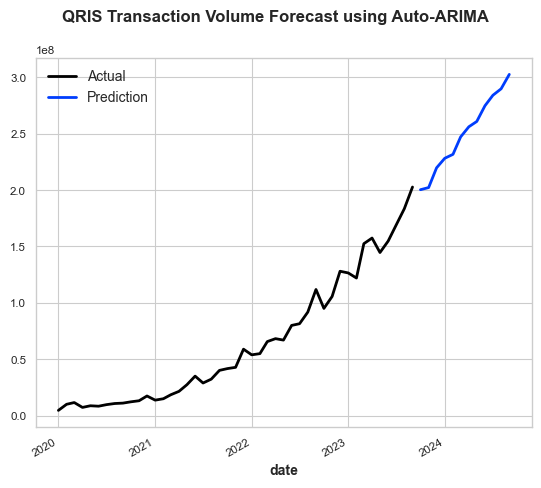

In [58]:
# Import pre-trained Auto-ARIMA model from pickle file
qris_vol_autoarima = pickle.load(open(model_path + 'qris_vol_autoarima.pkl', 'rb'))

# Forecast QRIS transaction volume using Auto-ARIMA model
pred_qris_vol_autoarima = pred_model(model=qris_vol_autoarima, len=forecast_horizon, train=qris_vol)

# Plot the forecast result
plot_actual_pred(actual=qris_vol, 
                 pred=pred_qris_vol_autoarima, 
                 suptitle='QRIS Transaction Volume Forecast using Auto-ARIMA', 
)

In [59]:
# Create a DataFrame for QRIS transaction volume forecast result
qris_vol_autoarima = out_pred_df(model=qris_vol_autoarima, 
                                 len=forecast_horizon,
                                 train=qris_vol,
                                 type_name='QRIS',
                                 model_name='Auto-ARIMA',
                                 col_id='_vol'
)

# Show qris_vol_autoarima DataFrame
qris_vol_autoarima

  0%|          | 0/10 [00:00<?, ?it/s]

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol
0,2020-01-01,QRIS,Actual,4.559188e+06,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-01,QRIS,Actual,9.965500e+06,NaN,NaN,NaN,NaN,NaN,1.1858
2,2020-03-01,QRIS,Actual,1.151187e+07,NaN,NaN,NaN,NaN,NaN,0.1552
3,2020-04-01,QRIS,Actual,7.200764e+06,NaN,NaN,NaN,NaN,NaN,-0.3745
4,2020-05-01,QRIS,Actual,8.664846e+06,NaN,NaN,NaN,NaN,NaN,0.2033
...,...,...,...,...,...,...,...,...,...,...
62,2024-05-01,QRIS,Auto-ARIMA,2.609040e+08,0.08,13612983.0,12264714.0,7.8,0.7919,0.0184
63,2024-06-01,QRIS,Auto-ARIMA,2.748578e+08,0.08,13612983.0,12264714.0,7.8,0.6541,0.0535
64,2024-07-01,QRIS,Auto-ARIMA,2.841527e+08,0.08,13612983.0,12264714.0,7.8,0.5640,0.0338
65,2024-08-01,QRIS,Auto-ARIMA,2.898711e+08,0.08,13612983.0,12264714.0,7.8,0.7114,0.0201


#### | QRIS Nom Auto-ARIMA Forecast

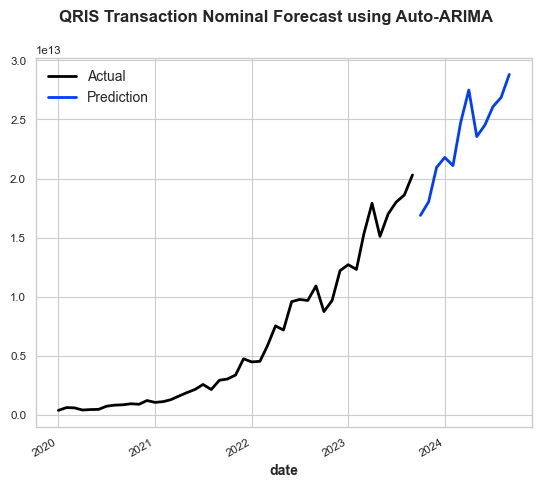

In [60]:
# Import pre-trained Auto-ARIMA model from pickle file
qris_nom_autoarima = pickle.load(open(model_path + 'qris_nom_autoarima.pkl', 'rb'))

# Forecast QRIS transaction nominal using Auto-ARIMA model
pred_qris_nom_autoarima = pred_model(model=qris_nom_autoarima, len=forecast_horizon, train=qris_nom)

# Plot the forecast result
plot_actual_pred(actual=qris_nom, 
                 pred=pred_qris_nom_autoarima, 
                 suptitle='QRIS Transaction Nominal Forecast using Auto-ARIMA', 
)

In [61]:
# Create a DataFrame for QRIS transaction nominal forecast result
qris_nom_autoarima = out_pred_df(model=qris_nom_autoarima, 
                                 len=forecast_horizon,
                                 train=qris_nom,
                                 type_name='QRIS',
                                 model_name='Auto-ARIMA',
                                 col_id='_nom'
)

# Show qris_nom_autoarima DataFrame
qris_nom_autoarima

  0%|          | 0/10 [00:00<?, ?it/s]

component,date,type,model,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2020-01-01,QRIS,Actual,3.650000e+11,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-01,QRIS,Actual,6.040000e+11,NaN,NaN,NaN,NaN,NaN,0.6548
2,2020-03-01,QRIS,Actual,5.810000e+11,NaN,NaN,NaN,NaN,NaN,-0.0381
3,2020-04-01,QRIS,Actual,3.970000e+11,NaN,NaN,NaN,NaN,NaN,-0.3167
4,2020-05-01,QRIS,Actual,4.340000e+11,NaN,NaN,NaN,NaN,NaN,0.0932
...,...,...,...,...,...,...,...,...,...,...
62,2024-05-01,QRIS,Auto-ARIMA,2.354953e+13,0.06,1.220511e+12,9.707630e+11,6.6,0.3867,-0.1434
63,2024-06-01,QRIS,Auto-ARIMA,2.453888e+13,0.06,1.220511e+12,9.707630e+11,6.6,0.2400,0.0420
64,2024-07-01,QRIS,Auto-ARIMA,2.607462e+13,0.06,1.220511e+12,9.707630e+11,6.6,0.5289,0.0626
65,2024-08-01,QRIS,Auto-ARIMA,2.686509e+13,0.06,1.220511e+12,9.707630e+11,6.6,0.4821,0.0303


#### | QRIS Vol & QRIS Nom Auto-ARIMA Forecast Merge

In [62]:
# Merge qris_vol_autoarima and qris_nom_autoarima DataFrames
qris_autoarima = pd.merge(qris_vol_autoarima, qris_nom_autoarima, on=['date', 'type', 'model'])

# Show qris_autoarima DataFrame
qris_autoarima

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2020-01-01,QRIS,Actual,4.559188e+06,NaN,NaN,NaN,NaN,NaN,NaN,3.650000e+11,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-01,QRIS,Actual,9.965500e+06,NaN,NaN,NaN,NaN,NaN,1.1858,6.040000e+11,NaN,NaN,NaN,NaN,NaN,0.6548
2,2020-03-01,QRIS,Actual,1.151187e+07,NaN,NaN,NaN,NaN,NaN,0.1552,5.810000e+11,NaN,NaN,NaN,NaN,NaN,-0.0381
3,2020-04-01,QRIS,Actual,7.200764e+06,NaN,NaN,NaN,NaN,NaN,-0.3745,3.970000e+11,NaN,NaN,NaN,NaN,NaN,-0.3167
4,2020-05-01,QRIS,Actual,8.664846e+06,NaN,NaN,NaN,NaN,NaN,0.2033,4.340000e+11,NaN,NaN,NaN,NaN,NaN,0.0932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2024-05-01,QRIS,Auto-ARIMA,2.609040e+08,0.08,13612983.0,12264714.0,7.8,0.7919,0.0184,2.354953e+13,0.06,1.220511e+12,9.707630e+11,6.6,0.3867,-0.1434
63,2024-06-01,QRIS,Auto-ARIMA,2.748578e+08,0.08,13612983.0,12264714.0,7.8,0.6541,0.0535,2.453888e+13,0.06,1.220511e+12,9.707630e+11,6.6,0.2400,0.0420
64,2024-07-01,QRIS,Auto-ARIMA,2.841527e+08,0.08,13612983.0,12264714.0,7.8,0.5640,0.0338,2.607462e+13,0.06,1.220511e+12,9.707630e+11,6.6,0.5289,0.0626
65,2024-08-01,QRIS,Auto-ARIMA,2.898711e+08,0.08,13612983.0,12264714.0,7.8,0.7114,0.0201,2.686509e+13,0.06,1.220511e+12,9.707630e+11,6.6,0.4821,0.0303


#### | Digital Banking Vol Auto-ARIMA Forecast

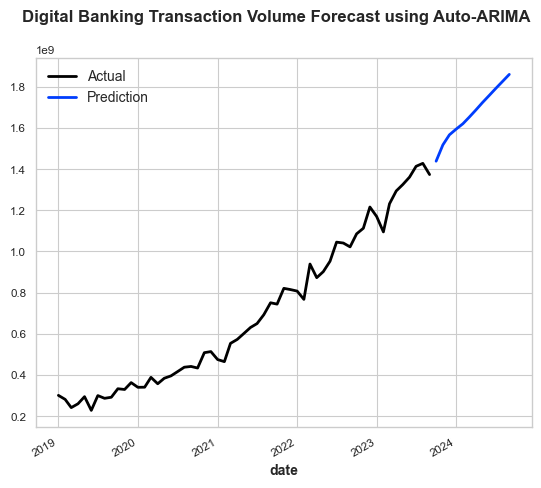

In [63]:
# Import pre-trained Auto-ARIMA model from pickle file
digital_banking_vol_autoarima = pickle.load(open(model_path + 'digital_banking_vol_autoarima.pkl', 'rb'))

# Forecast Digital Banking transaction volume using Auto-ARIMA model
pred_digital_banking_vol_autoarima = pred_model(model=digital_banking_vol_autoarima, len=forecast_horizon, train=digital_banking_vol)

# Plot the forecast result
plot_actual_pred(actual=digital_banking_vol, 
                 pred=pred_digital_banking_vol_autoarima, 
                 suptitle='Digital Banking Transaction Volume Forecast using Auto-ARIMA', 
)

In [64]:
# Create a DataFrame for Digital Banking transaction volume forecast result
digital_banking_vol_autoarima = out_pred_df(model=digital_banking_vol_autoarima, 
                                            len=forecast_horizon,
                                            train=digital_banking_vol,
                                            type_name='Digital Banking',
                                            model_name='Auto-ARIMA',
                                            col_id='_vol'
)

# Show digital_banking_vol_autoarima DataFrame
digital_banking_vol_autoarima

  0%|          | 0/13 [00:00<?, ?it/s]

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol
0,2019-01-01,Digital Banking,Actual,3.010860e+08,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Digital Banking,Actual,2.815659e+08,NaN,NaN,NaN,NaN,NaN,-0.0648
2,2019-03-01,Digital Banking,Actual,2.415977e+08,NaN,NaN,NaN,NaN,NaN,-0.1419
3,2019-04-01,Digital Banking,Actual,2.602234e+08,NaN,NaN,NaN,NaN,NaN,0.0771
4,2019-05-01,Digital Banking,Actual,2.947539e+08,NaN,NaN,NaN,NaN,NaN,0.1327
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Digital Banking,Auto-ARIMA,1.723530e+09,0.04,55951428.0,46412745.0,3.1,0.3500,0.0211
78,2024-06-01,Digital Banking,Auto-ARIMA,1.758135e+09,0.04,55951428.0,46412745.0,3.1,0.3430,0.0201
79,2024-07-01,Digital Banking,Auto-ARIMA,1.792101e+09,0.04,55951428.0,46412745.0,3.1,0.2941,0.0193
80,2024-08-01,Digital Banking,Auto-ARIMA,1.826063e+09,0.04,55951428.0,46412745.0,3.1,0.2675,0.0190


#### | Digital Banking Nom Auto-ARIMA Forecast

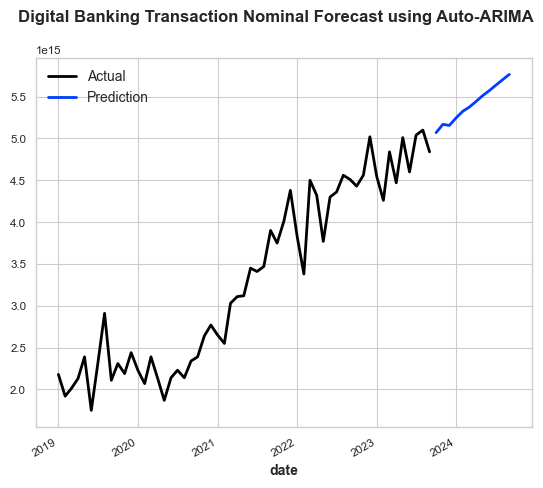

In [65]:
# Import pre-trained Auto-ARIMA model from pickle file
digital_banking_nom_autoarima = pickle.load(open(model_path + 'digital_banking_nom_autoarima.pkl', 'rb'))

# Forecast Digital Banking transaction nominal using Auto-ARIMA model
pred_digital_banking_nom_autoarima = pred_model(model=digital_banking_nom_autoarima, len=forecast_horizon, train=digital_banking_nom)

# Plot the forecast result
plot_actual_pred(actual=digital_banking_nom, 
                 pred=pred_digital_banking_nom_autoarima, 
                 suptitle='Digital Banking Transaction Nominal Forecast using Auto-ARIMA', 
)

In [66]:
# Create a DataFrame for Digital Banking transaction nominal forecast result
digital_banking_nom_autoarima = out_pred_df(model=digital_banking_nom_autoarima, 
                                            len=forecast_horizon,
                                            train=digital_banking_nom,
                                            type_name='Digital Banking',
                                            model_name='Auto-ARIMA',
                                            col_id='_nom'
)

# Show digital_banking_nom_autoarima DataFrame
digital_banking_nom_autoarima

  0%|          | 0/13 [00:00<?, ?it/s]

component,date,type,model,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,Digital Banking,Actual,2.180000e+15,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Digital Banking,Actual,1.920000e+15,NaN,NaN,NaN,NaN,NaN,-0.1193
2,2019-03-01,Digital Banking,Actual,2.010000e+15,NaN,NaN,NaN,NaN,NaN,0.0469
3,2019-04-01,Digital Banking,Actual,2.130000e+15,NaN,NaN,NaN,NaN,NaN,0.0597
4,2019-05-01,Digital Banking,Actual,2.390000e+15,NaN,NaN,NaN,NaN,NaN,0.1221
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Digital Banking,Auto-ARIMA,5.510395e+15,0.05,3.036271e+14,2.611505e+14,16.9,0.2172,0.0127
78,2024-06-01,Digital Banking,Auto-ARIMA,5.571531e+15,0.05,3.036271e+14,2.611505e+14,16.9,0.1108,0.0111
79,2024-07-01,Digital Banking,Auto-ARIMA,5.636163e+15,0.05,3.036271e+14,2.611505e+14,16.9,0.1942,0.0116
80,2024-08-01,Digital Banking,Auto-ARIMA,5.701893e+15,0.05,3.036271e+14,2.611505e+14,16.9,0.1208,0.0117


#### | Digital Banking Vol & Digital Banking Nom Auto-ARIMA Forecast Merge

In [67]:
# Merge digital_banking_vol_autoarima and digital_banking_nom_autoarima DataFrames
digital_banking_autoarima = pd.merge(digital_banking_vol_autoarima, digital_banking_nom_autoarima, on=['date', 'type', 'model'])

# Show digital_banking_autoarima DataFrame
digital_banking_autoarima

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,Digital Banking,Actual,3.010860e+08,NaN,NaN,NaN,NaN,NaN,NaN,2.180000e+15,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Digital Banking,Actual,2.815659e+08,NaN,NaN,NaN,NaN,NaN,-0.0648,1.920000e+15,NaN,NaN,NaN,NaN,NaN,-0.1193
2,2019-03-01,Digital Banking,Actual,2.415977e+08,NaN,NaN,NaN,NaN,NaN,-0.1419,2.010000e+15,NaN,NaN,NaN,NaN,NaN,0.0469
3,2019-04-01,Digital Banking,Actual,2.602234e+08,NaN,NaN,NaN,NaN,NaN,0.0771,2.130000e+15,NaN,NaN,NaN,NaN,NaN,0.0597
4,2019-05-01,Digital Banking,Actual,2.947539e+08,NaN,NaN,NaN,NaN,NaN,0.1327,2.390000e+15,NaN,NaN,NaN,NaN,NaN,0.1221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Digital Banking,Auto-ARIMA,1.723530e+09,0.04,55951428.0,46412745.0,3.1,0.3500,0.0211,5.510395e+15,0.05,3.036271e+14,2.611505e+14,16.9,0.2172,0.0127
78,2024-06-01,Digital Banking,Auto-ARIMA,1.758135e+09,0.04,55951428.0,46412745.0,3.1,0.3430,0.0201,5.571531e+15,0.05,3.036271e+14,2.611505e+14,16.9,0.1108,0.0111
79,2024-07-01,Digital Banking,Auto-ARIMA,1.792101e+09,0.04,55951428.0,46412745.0,3.1,0.2941,0.0193,5.636163e+15,0.05,3.036271e+14,2.611505e+14,16.9,0.1942,0.0116
80,2024-08-01,Digital Banking,Auto-ARIMA,1.826063e+09,0.04,55951428.0,46412745.0,3.1,0.2675,0.0190,5.701893e+15,0.05,3.036271e+14,2.611505e+14,16.9,0.1208,0.0117


### | Exponential Smoothing

#### | Debit Vol Exponential Smoothing Forecast

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


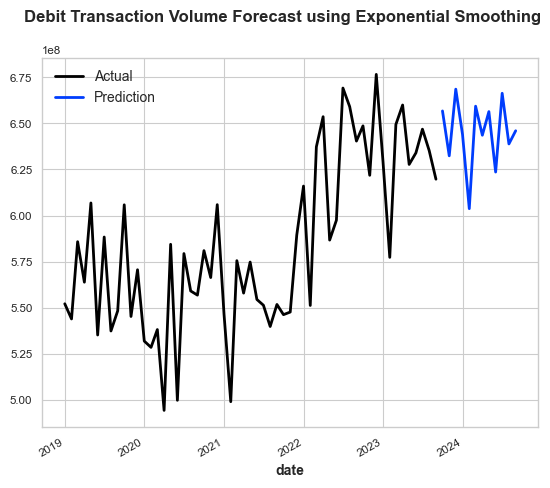

In [68]:
# Import pre-trained Exponential Smoothing model from pickle file
debit_vol_exp_smoothing = pickle.load(open(model_path + 'debit_vol_exp_smoothing.pkl', 'rb'))

# Forecast debit transaction volume using Exponential Smoothing model
pred_debit_vol_exp_smoothing = pred_model(model=debit_vol_exp_smoothing, len=forecast_horizon, train=debit_vol)

# Plot the forecast result
plot_actual_pred(actual=debit_vol, 
                 pred=pred_debit_vol_exp_smoothing, 
                 suptitle='Debit Transaction Volume Forecast using Exponential Smoothing', 
)

In [69]:
# Create a DataFrame for debit transaction volume forecast result
debit_vol_exp_smoothing = out_pred_df(model=debit_vol_exp_smoothing, 
                                      len=forecast_horizon,
                                      train=debit_vol,
                                      type_name='Debit',
                                      model_name='Exponential Smoothing',
                                      col_id='_vol'
)

# Show debit_vol_exp_smoothing DataFrame
debit_vol_exp_smoothing

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


  0%|          | 0/13 [00:00<?, ?it/s]

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWa

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol
0,2019-01-01,Debit,Actual,5.521845e+08,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Debit,Actual,5.439533e+08,NaN,NaN,NaN,NaN,NaN,-0.0149
2,2019-03-01,Debit,Actual,5.858424e+08,NaN,NaN,NaN,NaN,NaN,0.0770
3,2019-04-01,Debit,Actual,5.638822e+08,NaN,NaN,NaN,NaN,NaN,-0.0375
4,2019-05-01,Debit,Actual,6.068453e+08,NaN,NaN,NaN,NaN,NaN,0.0762
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Debit,Exponential Smoothing,6.563863e+08,0.03,21472311.0,18734269.0,12.1,-0.0017,0.0199
78,2024-06-01,Debit,Exponential Smoothing,6.236116e+08,0.03,21472311.0,18734269.0,12.1,0.0166,-0.0499
79,2024-07-01,Debit,Exponential Smoothing,6.663177e+08,0.03,21472311.0,18734269.0,12.1,0.0020,0.0685
80,2024-08-01,Debit,Exponential Smoothing,6.388559e+08,0.03,21472311.0,18734269.0,12.1,0.0128,-0.0412


#### | Debit Nom Exponential Smoothing Forecast

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


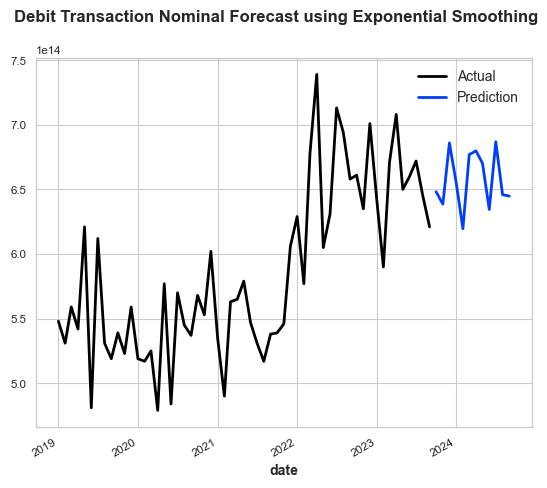

In [70]:
# Import pre-trained Exponential Smoothing model from pickle file
debit_nom_exp_smoothing = pickle.load(open(model_path + 'debit_nom_exp_smoothing.pkl', 'rb'))

# Forecast debit transaction nominal using Exponential Smoothing model
pred_debit_nom_exp_smoothing = pred_model(model=debit_nom_exp_smoothing, len=forecast_horizon, train=debit_nom)

# Plot the forecast result
plot_actual_pred(actual=debit_nom, 
                 pred=pred_debit_nom_exp_smoothing, 
                 suptitle='Debit Transaction Nominal Forecast using Exponential Smoothing', 
)

In [71]:
# Create a DataFrame for debit transaction nominal forecast result
debit_nom_exp_smoothing = out_pred_df(model=debit_nom_exp_smoothing, 
                                      len=forecast_horizon,
                                      train=debit_nom,
                                      type_name='Debit',
                                      model_name='Exponential Smoothing',
                                      col_id='_nom'
)

# Show debit_nom_exp_smoothing DataFrame
debit_nom_exp_smoothing

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


  0%|          | 0/13 [00:00<?, ?it/s]

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWa

component,date,type,model,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,Debit,Actual,5.480000e+14,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Debit,Actual,5.310000e+14,NaN,NaN,NaN,NaN,NaN,-0.0310
2,2019-03-01,Debit,Actual,5.590000e+14,NaN,NaN,NaN,NaN,NaN,0.0527
3,2019-04-01,Debit,Actual,5.420000e+14,NaN,NaN,NaN,NaN,NaN,-0.0304
4,2019-05-01,Debit,Actual,6.210000e+14,NaN,NaN,NaN,NaN,NaN,0.1458
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Debit,Exponential Smoothing,6.701353e+14,0.04,2.686689e+13,2.352456e+13,15.1,-0.0148,-0.0143
78,2024-06-01,Debit,Exponential Smoothing,6.344516e+14,0.04,2.686689e+13,2.352456e+13,15.1,0.0012,-0.0532
79,2024-07-01,Debit,Exponential Smoothing,6.868683e+14,0.04,2.686689e+13,2.352456e+13,15.1,-0.0160,0.0826
80,2024-08-01,Debit,Exponential Smoothing,6.459421e+14,0.04,2.686689e+13,2.352456e+13,15.1,-0.0030,-0.0596


#### | Debit Vol & Debit Nom Exponential Smoothing Forecast Merge

In [72]:
# Merge debit_vol_exp_smoothing and debit_nom_exp_smoothing DataFrames
debit_exp_smoothing = pd.merge(debit_vol_exp_smoothing, debit_nom_exp_smoothing, on=['date', 'type', 'model'])

# Show debit_exp_smoothing DataFrame
debit_exp_smoothing

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,Debit,Actual,5.521845e+08,NaN,NaN,NaN,NaN,NaN,NaN,5.480000e+14,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Debit,Actual,5.439533e+08,NaN,NaN,NaN,NaN,NaN,-0.0149,5.310000e+14,NaN,NaN,NaN,NaN,NaN,-0.0310
2,2019-03-01,Debit,Actual,5.858424e+08,NaN,NaN,NaN,NaN,NaN,0.0770,5.590000e+14,NaN,NaN,NaN,NaN,NaN,0.0527
3,2019-04-01,Debit,Actual,5.638822e+08,NaN,NaN,NaN,NaN,NaN,-0.0375,5.420000e+14,NaN,NaN,NaN,NaN,NaN,-0.0304
4,2019-05-01,Debit,Actual,6.068453e+08,NaN,NaN,NaN,NaN,NaN,0.0762,6.210000e+14,NaN,NaN,NaN,NaN,NaN,0.1458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Debit,Exponential Smoothing,6.563863e+08,0.03,21472311.0,18734269.0,12.1,-0.0017,0.0199,6.701353e+14,0.04,2.686689e+13,2.352456e+13,15.1,-0.0148,-0.0143
78,2024-06-01,Debit,Exponential Smoothing,6.236116e+08,0.03,21472311.0,18734269.0,12.1,0.0166,-0.0499,6.344516e+14,0.04,2.686689e+13,2.352456e+13,15.1,0.0012,-0.0532
79,2024-07-01,Debit,Exponential Smoothing,6.663177e+08,0.03,21472311.0,18734269.0,12.1,0.0020,0.0685,6.868683e+14,0.04,2.686689e+13,2.352456e+13,15.1,-0.0160,0.0826
80,2024-08-01,Debit,Exponential Smoothing,6.388559e+08,0.03,21472311.0,18734269.0,12.1,0.0128,-0.0412,6.459421e+14,0.04,2.686689e+13,2.352456e+13,15.1,-0.0030,-0.0596


#### | Credit Vol Prophet Forecast

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


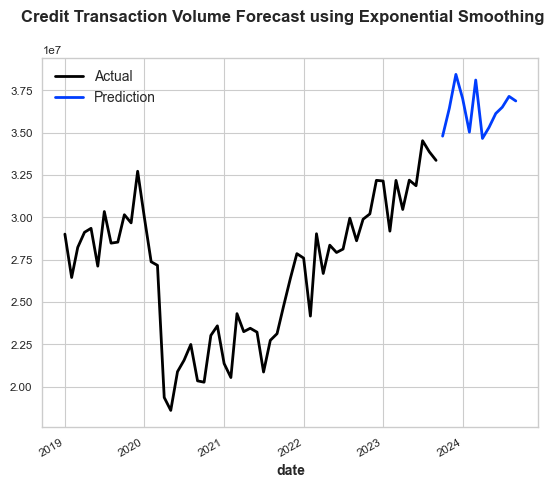

In [73]:
# Import pre-trained Exponential Smoothing model from pickle file
credit_vol_exp_smoothing = pickle.load(open(model_path + 'credit_vol_exp_smoothing.pkl', 'rb'))

# Forecast credit transaction volume using Exponential Smoothing model
pred_credit_vol_exp_smoothing = pred_model(model=credit_vol_exp_smoothing, len=forecast_horizon, train=credit_vol)

# Plot the forecast result
plot_actual_pred(actual=credit_vol, 
                 pred=pred_credit_vol_exp_smoothing, 
                 suptitle='Credit Transaction Volume Forecast using Exponential Smoothing', 
)

In [74]:
# Create a DataFrame for credit transaction volume forecast result
credit_vol_exp_smoothing = out_pred_df(model=credit_vol_exp_smoothing, 
                                       len=forecast_horizon,
                                       train=credit_vol,
                                       type_name='Credit',
                                       model_name='Exponential Smoothing',
                                       col_id='_vol'
)

# Show credit_vol_exp_smoothing DataFrame
credit_vol_exp_smoothing

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


  0%|          | 0/13 [00:00<?, ?it/s]

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWa

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol
0,2019-01-01,Credit,Actual,2.901256e+07,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Credit,Actual,2.644951e+07,NaN,NaN,NaN,NaN,NaN,-0.0883
2,2019-03-01,Credit,Actual,2.823013e+07,NaN,NaN,NaN,NaN,NaN,0.0673
3,2019-04-01,Credit,Actual,2.912024e+07,NaN,NaN,NaN,NaN,NaN,0.0315
4,2019-05-01,Credit,Actual,2.935492e+07,NaN,NaN,NaN,NaN,NaN,0.0081
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Credit,Exponential Smoothing,3.531425e+07,0.03,1206333.0,982124.0,6.6,0.1467,0.0187
78,2024-06-01,Credit,Exponential Smoothing,3.613682e+07,0.03,1206333.0,982124.0,6.6,0.1002,0.0233
79,2024-07-01,Credit,Exponential Smoothing,3.650943e+07,0.03,1206333.0,982124.0,6.6,0.1352,0.0103
80,2024-08-01,Credit,Exponential Smoothing,3.714833e+07,0.03,1206333.0,982124.0,6.6,0.0596,0.0175


#### | Credit Nom Exponential Smoothing Forecast

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


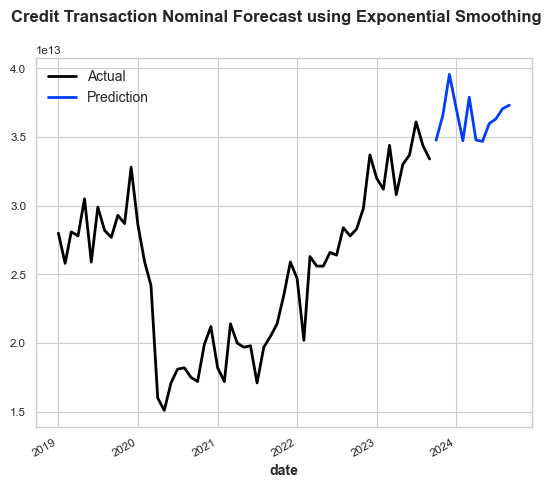

In [75]:
# Import pre-trained Exponential Smoothing model from pickle file
credit_nom_exp_smoothing = pickle.load(open(model_path + 'credit_nom_exp_smoothing.pkl', 'rb'))

# Forecast credit transaction nominal using Exponential Smoothing model
pred_credit_nom_exp_smoothing = pred_model(model=credit_nom_exp_smoothing, len=forecast_horizon, train=credit_nom)

# Plot the forecast result
plot_actual_pred(actual=credit_nom, 
                 pred=pred_credit_nom_exp_smoothing, 
                 suptitle='Credit Transaction Nominal Forecast using Exponential Smoothing', 
)

In [76]:
# Create a DataFrame for credit transaction nominal forecast result
credit_nom_exp_smoothing = out_pred_df(model=credit_nom_exp_smoothing, 
                                       len=forecast_horizon,
                                       train=credit_nom,
                                       type_name='Credit',
                                       model_name='Exponential Smoothing',
                                       col_id='_nom'
)

# Show credit_nom_exp_smoothing DataFrame
credit_nom_exp_smoothing

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


  0%|          | 0/13 [00:00<?, ?it/s]

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWa

component,date,type,model,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,Credit,Actual,2.800000e+13,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Credit,Actual,2.580000e+13,NaN,NaN,NaN,NaN,NaN,-0.0786
2,2019-03-01,Credit,Actual,2.810000e+13,NaN,NaN,NaN,NaN,NaN,0.0891
3,2019-04-01,Credit,Actual,2.780000e+13,NaN,NaN,NaN,NaN,NaN,-0.0107
4,2019-05-01,Credit,Actual,3.050000e+13,NaN,NaN,NaN,NaN,NaN,0.0971
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Credit,Exponential Smoothing,3.468244e+13,0.03,1.320428e+12,1.053294e+12,7.1,0.1243,-0.0029
78,2024-06-01,Credit,Exponential Smoothing,3.598398e+13,0.03,1.320428e+12,1.053294e+12,7.1,0.0500,0.0375
79,2024-07-01,Credit,Exponential Smoothing,3.630957e+13,0.03,1.320428e+12,1.053294e+12,7.1,0.0598,0.0090
80,2024-08-01,Credit,Exponential Smoothing,3.705730e+13,0.03,1.320428e+12,1.053294e+12,7.1,0.0037,0.0206


#### | Credit Vol & Credit Nom Prophet Forecast Merge

In [77]:
# Merge credit_vol_exp_smoothing and credit_nom_exp_smoothing DataFrames
credit_exp_smoothing = pd.merge(credit_vol_exp_smoothing, credit_nom_exp_smoothing, on=['date', 'type', 'model'])

# Show credit_exp_smoothing DataFrame
credit_exp_smoothing

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,Credit,Actual,2.901256e+07,NaN,NaN,NaN,NaN,NaN,NaN,2.800000e+13,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Credit,Actual,2.644951e+07,NaN,NaN,NaN,NaN,NaN,-0.0883,2.580000e+13,NaN,NaN,NaN,NaN,NaN,-0.0786
2,2019-03-01,Credit,Actual,2.823013e+07,NaN,NaN,NaN,NaN,NaN,0.0673,2.810000e+13,NaN,NaN,NaN,NaN,NaN,0.0891
3,2019-04-01,Credit,Actual,2.912024e+07,NaN,NaN,NaN,NaN,NaN,0.0315,2.780000e+13,NaN,NaN,NaN,NaN,NaN,-0.0107
4,2019-05-01,Credit,Actual,2.935492e+07,NaN,NaN,NaN,NaN,NaN,0.0081,3.050000e+13,NaN,NaN,NaN,NaN,NaN,0.0971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Credit,Exponential Smoothing,3.531425e+07,0.03,1206333.0,982124.0,6.6,0.1467,0.0187,3.468244e+13,0.03,1.320428e+12,1.053294e+12,7.1,0.1243,-0.0029
78,2024-06-01,Credit,Exponential Smoothing,3.613682e+07,0.03,1206333.0,982124.0,6.6,0.1002,0.0233,3.598398e+13,0.03,1.320428e+12,1.053294e+12,7.1,0.0500,0.0375
79,2024-07-01,Credit,Exponential Smoothing,3.650943e+07,0.03,1206333.0,982124.0,6.6,0.1352,0.0103,3.630957e+13,0.03,1.320428e+12,1.053294e+12,7.1,0.0598,0.0090
80,2024-08-01,Credit,Exponential Smoothing,3.714833e+07,0.03,1206333.0,982124.0,6.6,0.0596,0.0175,3.705730e+13,0.03,1.320428e+12,1.053294e+12,7.1,0.0037,0.0206


#### | UE Bank Vol Exponential Smoothing Forecast

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


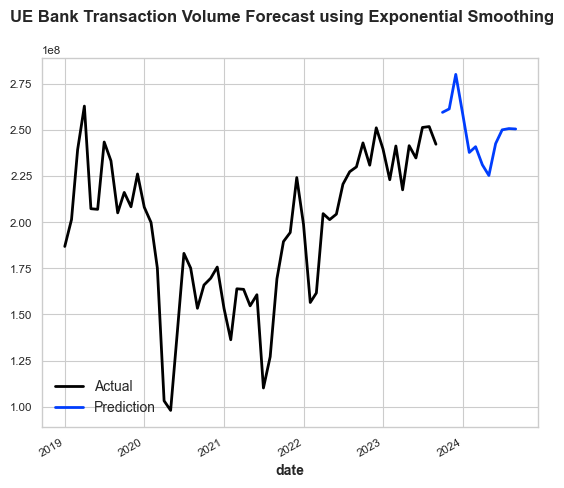

In [78]:
# Import pre-trained Exponential Smoothing model from pickle file
ue_bank_vol_exp_smoothing = pickle.load(open(model_path + 'ue_bank_vol_exp_smoothing.pkl', 'rb'))

# Forecast UE Bank transaction volume using Exponential Smoothing model
pred_ue_bank_vol_exp_smoothing = pred_model(model=ue_bank_vol_exp_smoothing, len=forecast_horizon, train=ue_bank_vol)

# Plot the forecast result
plot_actual_pred(actual=ue_bank_vol, 
                 pred=pred_ue_bank_vol_exp_smoothing, 
                 suptitle='UE Bank Transaction Volume Forecast using Exponential Smoothing', 
)

In [79]:
# Create a DataFrame for UE Bank transaction volume forecast result
ue_bank_vol_exp_smoothing = out_pred_df(model=ue_bank_vol_exp_smoothing, 
                                        len=forecast_horizon,
                                        train=ue_bank_vol,
                                        type_name='UE Bank',
                                        model_name='Exponential Smoothing',
                                        col_id='_vol'
)

# Show ue_bank_vol_exp_smoothing DataFrame
ue_bank_vol_exp_smoothing

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


  0%|          | 0/13 [00:00<?, ?it/s]

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWa

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol
0,2019-01-01,UE Bank,Actual,1.868224e+08,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,UE Bank,Actual,2.013995e+08,NaN,NaN,NaN,NaN,NaN,0.0780
2,2019-03-01,UE Bank,Actual,2.392136e+08,NaN,NaN,NaN,NaN,NaN,0.1878
3,2019-04-01,UE Bank,Actual,2.628318e+08,NaN,NaN,NaN,NaN,NaN,0.0987
4,2019-05-01,UE Bank,Actual,2.072598e+08,NaN,NaN,NaN,NaN,NaN,-0.2114
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,UE Bank,Exponential Smoothing,2.252509e+08,0.06,16525207.0,13876085.0,9.1,0.0638,-0.0251
78,2024-06-01,UE Bank,Exponential Smoothing,2.425201e+08,0.06,16525207.0,13876085.0,9.1,-0.0656,0.0767
79,2024-07-01,UE Bank,Exponential Smoothing,2.499681e+08,0.06,16525207.0,13876085.0,9.1,0.0310,0.0307
80,2024-08-01,UE Bank,Exponential Smoothing,2.506599e+08,0.06,16525207.0,13876085.0,9.1,-0.0067,0.0028


#### | UE Bank Nom Exponential Smoothing Forecast

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


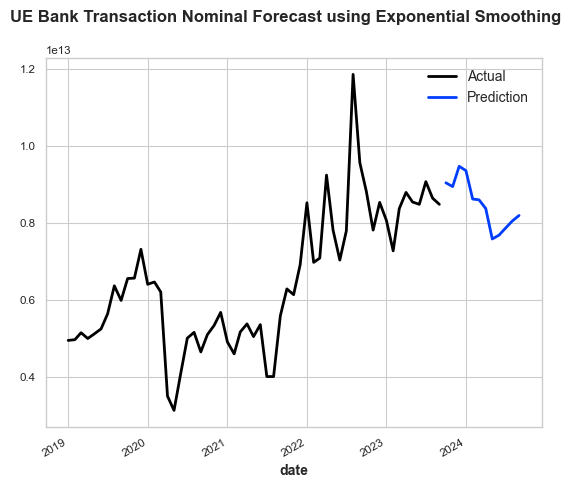

In [80]:
# Import pre-trained Exponential Smoothing model from pickle file
ue_bank_nom_exp_smoothing = pickle.load(open(model_path + 'ue_bank_nom_exp_smoothing.pkl', 'rb'))

# Forecast UE Bank transaction nominal using Exponential Smoothing model
pred_ue_bank_nom_exp_smoothing = pred_model(model=ue_bank_nom_exp_smoothing, len=forecast_horizon, train=ue_bank_nom)

# Plot the forecast result
plot_actual_pred(actual=ue_bank_nom, 
                 pred=pred_ue_bank_nom_exp_smoothing, 
                 suptitle='UE Bank Transaction Nominal Forecast using Exponential Smoothing', 
)

In [81]:
# Create a DataFrame for UE Bank transaction nominal forecast result
ue_bank_nom_exp_smoothing = out_pred_df(model=ue_bank_nom_exp_smoothing, 
                                        len=forecast_horizon,
                                        train=ue_bank_nom,
                                        type_name='UE Bank',
                                        model_name='Exponential Smoothing',
                                        col_id='_nom'
)

# Show ue_bank_nom_exp_smoothing DataFrame
ue_bank_nom_exp_smoothing

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


  0%|          | 0/13 [00:00<?, ?it/s]

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWa

component,date,type,model,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,UE Bank,Actual,4.940000e+12,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,UE Bank,Actual,4.960000e+12,NaN,NaN,NaN,NaN,NaN,0.0040
2,2019-03-01,UE Bank,Actual,5.140000e+12,NaN,NaN,NaN,NaN,NaN,0.0363
3,2019-04-01,UE Bank,Actual,4.990000e+12,NaN,NaN,NaN,NaN,NaN,-0.0292
4,2019-05-01,UE Bank,Actual,5.110000e+12,NaN,NaN,NaN,NaN,NaN,0.0240
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,UE Bank,Exponential Smoothing,7.579007e+12,0.08,9.752113e+11,7.581550e+11,5.2,-0.0180,-0.0945
78,2024-06-01,UE Bank,Exponential Smoothing,7.678936e+12,0.08,9.752113e+11,7.581550e+11,5.2,-0.0901,0.0132
79,2024-07-01,UE Bank,Exponential Smoothing,7.862525e+12,0.08,9.752113e+11,7.581550e+11,5.2,-0.0910,0.0239
80,2024-08-01,UE Bank,Exponential Smoothing,8.046899e+12,0.08,9.752113e+11,7.581550e+11,5.2,-0.1200,0.0234


#### | UE Bank Vol & UE Bank Nom Exponential Smoothing Forecast Merge

In [82]:
# Merge ue_bank_vol_exp_smoothing and ue_bank_nom_exp_smoothing DataFrames
ue_bank_exp_smoothing = pd.merge(ue_bank_vol_exp_smoothing, ue_bank_nom_exp_smoothing, on=['date', 'type', 'model'])

# Show ue_bank_exp_smoothing DataFrame
ue_bank_exp_smoothing

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,UE Bank,Actual,1.868224e+08,NaN,NaN,NaN,NaN,NaN,NaN,4.940000e+12,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,UE Bank,Actual,2.013995e+08,NaN,NaN,NaN,NaN,NaN,0.0780,4.960000e+12,NaN,NaN,NaN,NaN,NaN,0.0040
2,2019-03-01,UE Bank,Actual,2.392136e+08,NaN,NaN,NaN,NaN,NaN,0.1878,5.140000e+12,NaN,NaN,NaN,NaN,NaN,0.0363
3,2019-04-01,UE Bank,Actual,2.628318e+08,NaN,NaN,NaN,NaN,NaN,0.0987,4.990000e+12,NaN,NaN,NaN,NaN,NaN,-0.0292
4,2019-05-01,UE Bank,Actual,2.072598e+08,NaN,NaN,NaN,NaN,NaN,-0.2114,5.110000e+12,NaN,NaN,NaN,NaN,NaN,0.0240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,UE Bank,Exponential Smoothing,2.252509e+08,0.06,16525207.0,13876085.0,9.1,0.0638,-0.0251,7.579007e+12,0.08,9.752113e+11,7.581550e+11,5.2,-0.0180,-0.0945
78,2024-06-01,UE Bank,Exponential Smoothing,2.425201e+08,0.06,16525207.0,13876085.0,9.1,-0.0656,0.0767,7.678936e+12,0.08,9.752113e+11,7.581550e+11,5.2,-0.0901,0.0132
79,2024-07-01,UE Bank,Exponential Smoothing,2.499681e+08,0.06,16525207.0,13876085.0,9.1,0.0310,0.0307,7.862525e+12,0.08,9.752113e+11,7.581550e+11,5.2,-0.0910,0.0239
80,2024-08-01,UE Bank,Exponential Smoothing,2.506599e+08,0.06,16525207.0,13876085.0,9.1,-0.0067,0.0028,8.046899e+12,0.08,9.752113e+11,7.581550e+11,5.2,-0.1200,0.0234


#### | UE Non Bank Vol Prophet Forecast

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


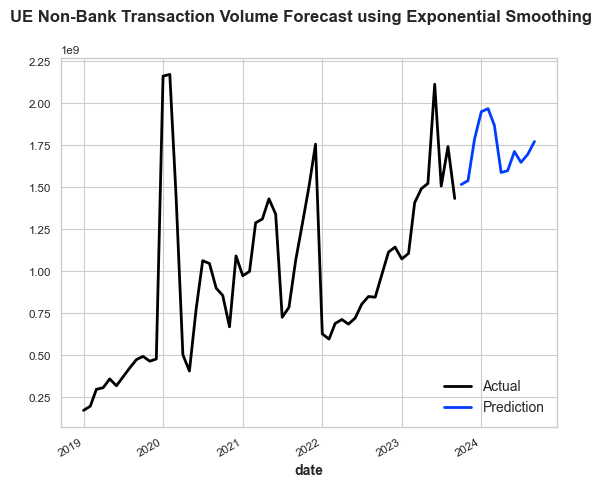

In [83]:
# Import pre-trained Exponential Smoothing model from pickle file
ue_nonbank_vol_exp_smoothing = pickle.load(open(model_path + 'ue_nonbank_vol_exp_smoothing.pkl', 'rb'))

# Forecast UE Non-Bank transaction volume using Exponential Smoothing model
pred_ue_nonbank_vol_exp_smoothing = pred_model(model=ue_nonbank_vol_exp_smoothing, len=forecast_horizon, train=ue_nonbank_vol)

# Plot the forecast result
plot_actual_pred(actual=ue_nonbank_vol, 
                 pred=pred_ue_nonbank_vol_exp_smoothing, 
                 suptitle='UE Non-Bank Transaction Volume Forecast using Exponential Smoothing', 
)

In [84]:
# Create a DataFrame for UE Non-Bank transaction volume forecast result
ue_nonbank_vol_exp_smoothing = out_pred_df(model=ue_nonbank_vol_exp_smoothing, 
                                           len=forecast_horizon,
                                           train=ue_nonbank_vol,
                                           type_name='UE Non-Bank',
                                           model_name='Exponential Smoothing',
                                           col_id='_vol'
)

# Show ue_nonbank_vol_exp_smoothing DataFrame
ue_nonbank_vol_exp_smoothing

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


  0%|          | 0/13 [00:00<?, ?it/s]

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWa

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol
0,2019-01-01,UE Non-Bank,Actual,1.731632e+08,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,UE Non-Bank,Actual,1.980435e+08,NaN,NaN,NaN,NaN,NaN,0.1437
2,2019-03-01,UE Non-Bank,Actual,2.985798e+08,NaN,NaN,NaN,NaN,NaN,0.5076
3,2019-04-01,UE Non-Bank,Actual,3.080419e+08,NaN,NaN,NaN,NaN,NaN,0.0317
4,2019-05-01,UE Non-Bank,Actual,3.604117e+08,NaN,NaN,NaN,NaN,NaN,0.1700
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,UE Non-Bank,Exponential Smoothing,1.599233e+09,0.19,299885952.0,249249175.0,16.5,0.0627,0.0066
78,2024-06-01,UE Non-Bank,Exponential Smoothing,1.713413e+09,0.19,299885952.0,249249175.0,16.5,0.0440,0.0714
79,2024-07-01,UE Non-Bank,Exponential Smoothing,1.649101e+09,0.19,299885952.0,249249175.0,16.5,-0.1960,-0.0375
80,2024-08-01,UE Non-Bank,Exponential Smoothing,1.696287e+09,0.19,299885952.0,249249175.0,16.5,0.0865,0.0286


#### | UE Non Bank Nom Prophet Forecast

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


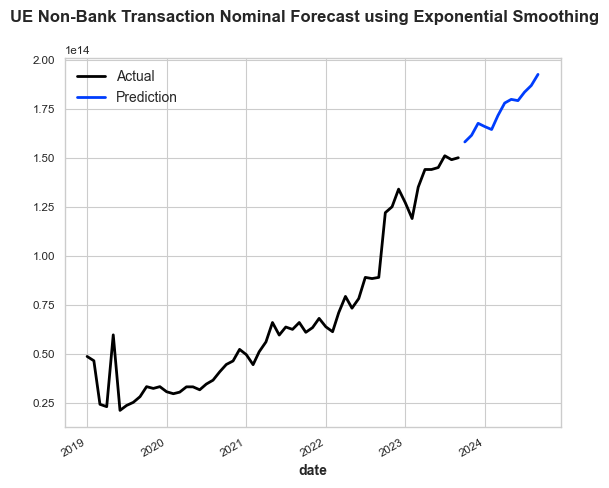

In [85]:
# Import pre-trained Exponential Smoothing model from pickle file
ue_nonbank_nom_exp_smoothing = pickle.load(open(model_path + 'ue_nonbank_nom_exp_smoothing.pkl', 'rb'))

# Forecast UE Non-Bank transaction nominal using Exponential Smoothing model
pred_ue_nonbank_nom_exp_smoothing = pred_model(model=ue_nonbank_nom_exp_smoothing, len=forecast_horizon, train=ue_nonbank_nom)

# Plot the forecast result
plot_actual_pred(actual=ue_nonbank_nom, 
                 pred=pred_ue_nonbank_nom_exp_smoothing, 
                 suptitle='UE Non-Bank Transaction Nominal Forecast using Exponential Smoothing', 
)

In [86]:
# Create a DataFrame for UE Non-Bank transaction nominal forecast result
ue_nonbank_nom_exp_smoothing = out_pred_df(model=ue_nonbank_nom_exp_smoothing, 
                                           len=forecast_horizon,
                                           train=ue_nonbank_nom,
                                           type_name='UE Non-Bank',
                                           model_name='Exponential Smoothing',
                                           col_id='_nom'
)

# Show ue_nonbank_nom_exp_smoothing DataFrame
ue_nonbank_nom_exp_smoothing

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


  0%|          | 0/13 [00:00<?, ?it/s]

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWa

component,date,type,model,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,UE Non-Bank,Actual,4.870000e+13,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,UE Non-Bank,Actual,4.650000e+13,NaN,NaN,NaN,NaN,NaN,-0.0452
2,2019-03-01,UE Non-Bank,Actual,2.430000e+13,NaN,NaN,NaN,NaN,NaN,-0.4774
3,2019-04-01,UE Non-Bank,Actual,2.310000e+13,NaN,NaN,NaN,NaN,NaN,-0.0494
4,2019-05-01,UE Non-Bank,Actual,5.970000e+13,NaN,NaN,NaN,NaN,NaN,1.5844
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,UE Non-Bank,Exponential Smoothing,1.797515e+14,0.06,1.023886e+13,7.175777e+12,5.2,0.2233,0.0105
78,2024-06-01,UE Non-Bank,Exponential Smoothing,1.791149e+14,0.06,1.023886e+13,7.175777e+12,5.2,0.2243,-0.0035
79,2024-07-01,UE Non-Bank,Exponential Smoothing,1.834362e+14,0.06,1.023886e+13,7.175777e+12,5.2,0.2111,0.0241
80,2024-08-01,UE Non-Bank,Exponential Smoothing,1.868117e+14,0.06,1.023886e+13,7.175777e+12,5.2,0.1973,0.0184


#### | UE Non Bank Vol & UE Non Bank Nom Prophet Forecast Merge

In [87]:
# Merge ue_nonbank_vol_exp_smoothing and ue_nonbank_nom_exp_smoothing DataFrames
ue_nonbank_exp_smoothing = pd.merge(ue_nonbank_vol_exp_smoothing, ue_nonbank_nom_exp_smoothing, on=['date', 'type', 'model'])

# Show ue_nonbank_exp_smoothing DataFrame
ue_nonbank_exp_smoothing

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,UE Non-Bank,Actual,1.731632e+08,NaN,NaN,NaN,NaN,NaN,NaN,4.870000e+13,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,UE Non-Bank,Actual,1.980435e+08,NaN,NaN,NaN,NaN,NaN,0.1437,4.650000e+13,NaN,NaN,NaN,NaN,NaN,-0.0452
2,2019-03-01,UE Non-Bank,Actual,2.985798e+08,NaN,NaN,NaN,NaN,NaN,0.5076,2.430000e+13,NaN,NaN,NaN,NaN,NaN,-0.4774
3,2019-04-01,UE Non-Bank,Actual,3.080419e+08,NaN,NaN,NaN,NaN,NaN,0.0317,2.310000e+13,NaN,NaN,NaN,NaN,NaN,-0.0494
4,2019-05-01,UE Non-Bank,Actual,3.604117e+08,NaN,NaN,NaN,NaN,NaN,0.1700,5.970000e+13,NaN,NaN,NaN,NaN,NaN,1.5844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,UE Non-Bank,Exponential Smoothing,1.599233e+09,0.19,299885952.0,249249175.0,16.5,0.0627,0.0066,1.797515e+14,0.06,1.023886e+13,7.175777e+12,5.2,0.2233,0.0105
78,2024-06-01,UE Non-Bank,Exponential Smoothing,1.713413e+09,0.19,299885952.0,249249175.0,16.5,0.0440,0.0714,1.791149e+14,0.06,1.023886e+13,7.175777e+12,5.2,0.2243,-0.0035
79,2024-07-01,UE Non-Bank,Exponential Smoothing,1.649101e+09,0.19,299885952.0,249249175.0,16.5,-0.1960,-0.0375,1.834362e+14,0.06,1.023886e+13,7.175777e+12,5.2,0.2111,0.0241
80,2024-08-01,UE Non-Bank,Exponential Smoothing,1.696287e+09,0.19,299885952.0,249249175.0,16.5,0.0865,0.0286,1.868117e+14,0.06,1.023886e+13,7.175777e+12,5.2,0.1973,0.0184


#### | QRIS Vol Exponential Smoothing Forecast

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


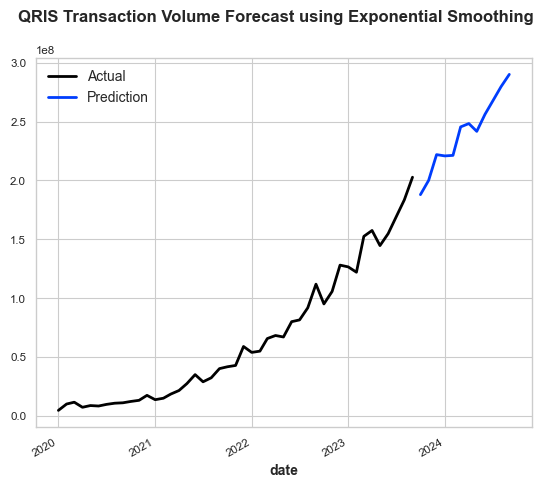

In [88]:
# Import pre-trained Exponential Smoothing model from pickle file
qris_vol_exp_smoothing = pickle.load(open(model_path + 'qris_vol_exp_smoothing.pkl', 'rb'))

# Forecast QRIS transaction volume using Exponential Smoothing model
pred_qris_vol_exp_smoothing = pred_model(model=qris_vol_exp_smoothing, len=forecast_horizon, train=qris_vol)

# Plot the forecast result
plot_actual_pred(actual=qris_vol, 
                 pred=pred_qris_vol_exp_smoothing, 
                 suptitle='QRIS Transaction Volume Forecast using Exponential Smoothing', 
)

In [89]:
# Create a DataFrame for QRIS transaction volume forecast result
qris_vol_exp_smoothing = out_pred_df(model=qris_vol_exp_smoothing, 
                                     len=forecast_horizon,
                                     train=qris_vol,
                                     type_name='QRIS',
                                     model_name='Exponential Smoothing',
                                     col_id='_vol'
)

# Show qris_vol_exp_smoothing DataFrame
qris_vol_exp_smoothing

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


  0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWa

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol
0,2020-01-01,QRIS,Actual,4.559188e+06,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-01,QRIS,Actual,9.965500e+06,NaN,NaN,NaN,NaN,NaN,1.1858
2,2020-03-01,QRIS,Actual,1.151187e+07,NaN,NaN,NaN,NaN,NaN,0.1552
3,2020-04-01,QRIS,Actual,7.200764e+06,NaN,NaN,NaN,NaN,NaN,-0.3745
4,2020-05-01,QRIS,Actual,8.664846e+06,NaN,NaN,NaN,NaN,NaN,0.2033
...,...,...,...,...,...,...,...,...,...,...
62,2024-05-01,QRIS,Exponential Smoothing,2.417013e+08,0.07,11393968.0,10571368.0,6.6,0.4994,-0.0267
63,2024-06-01,QRIS,Exponential Smoothing,2.561536e+08,0.07,11393968.0,10571368.0,6.6,0.5269,0.0598
64,2024-07-01,QRIS,Exponential Smoothing,2.677314e+08,0.07,11393968.0,10571368.0,6.6,0.6283,0.0452
65,2024-08-01,QRIS,Exponential Smoothing,2.797561e+08,0.07,11393968.0,10571368.0,6.6,0.6219,0.0449


#### | QRIS Nom Exponential Smoothing Forecast

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


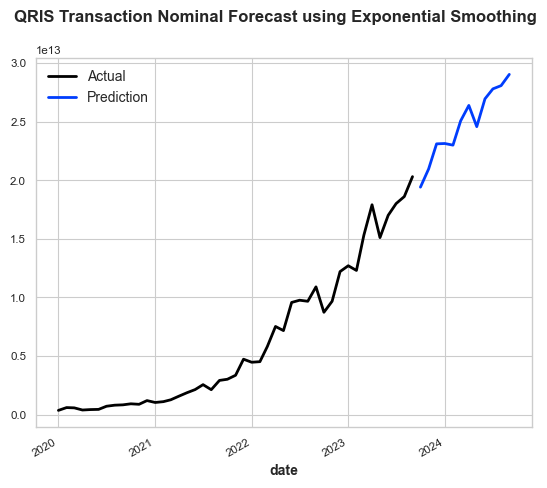

In [90]:
# Import pre-trained Exponential Smoothing model from pickle file
qris_nom_exp_smoothing = pickle.load(open(model_path + 'qris_nom_exp_smoothing.pkl', 'rb'))

# Forecast QRIS transaction nominal using Exponential Smoothing model
pred_qris_nom_exp_smoothing = pred_model(model=qris_nom_exp_smoothing, len=forecast_horizon, train=qris_nom)

# Plot the forecast result
plot_actual_pred(actual=qris_nom, 
                 pred=pred_qris_nom_exp_smoothing, 
                 suptitle='QRIS Transaction Nominal Forecast using Exponential Smoothing', 
)

In [91]:
# Create a DataFrame for QRIS transaction nominal forecast result
qris_nom_exp_smoothing = out_pred_df(model=qris_nom_exp_smoothing, 
                                     len=forecast_horizon,
                                     train=qris_nom,
                                     type_name='QRIS',
                                     model_name='Exponential Smoothing',
                                     col_id='_nom'
)

# Show qris_nom_exp_smoothing DataFrame
qris_nom_exp_smoothing

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


  0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWa

component,date,type,model,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2020-01-01,QRIS,Actual,3.650000e+11,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-01,QRIS,Actual,6.040000e+11,NaN,NaN,NaN,NaN,NaN,0.6548
2,2020-03-01,QRIS,Actual,5.810000e+11,NaN,NaN,NaN,NaN,NaN,-0.0381
3,2020-04-01,QRIS,Actual,3.970000e+11,NaN,NaN,NaN,NaN,NaN,-0.3167
4,2020-05-01,QRIS,Actual,4.340000e+11,NaN,NaN,NaN,NaN,NaN,0.0932
...,...,...,...,...,...,...,...,...,...,...
62,2024-05-01,QRIS,Exponential Smoothing,2.456166e+13,0.1,1.675422e+12,1.440205e+12,9.4,0.3443,-0.0686
63,2024-06-01,QRIS,Exponential Smoothing,2.693447e+13,0.1,1.675422e+12,1.440205e+12,9.4,0.5065,0.0966
64,2024-07-01,QRIS,Exponential Smoothing,2.778383e+13,0.1,1.675422e+12,1.440205e+12,9.4,0.6181,0.0315
65,2024-08-01,QRIS,Exponential Smoothing,2.805901e+13,0.1,1.675422e+12,1.440205e+12,9.4,0.5556,0.0099


#### | QRIS Vol & QRIS Nom Exponential Smoothing Forecast Merge

In [92]:
# Merge qris_vol_exp_smoothing and qris_nom_exp_smoothing DataFrames
qris_exp_smoothing = pd.merge(qris_vol_exp_smoothing, qris_nom_exp_smoothing, on=['date', 'type', 'model'])

# Show qris_exp_smoothing DataFrame
qris_exp_smoothing

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2020-01-01,QRIS,Actual,4.559188e+06,NaN,NaN,NaN,NaN,NaN,NaN,3.650000e+11,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-01,QRIS,Actual,9.965500e+06,NaN,NaN,NaN,NaN,NaN,1.1858,6.040000e+11,NaN,NaN,NaN,NaN,NaN,0.6548
2,2020-03-01,QRIS,Actual,1.151187e+07,NaN,NaN,NaN,NaN,NaN,0.1552,5.810000e+11,NaN,NaN,NaN,NaN,NaN,-0.0381
3,2020-04-01,QRIS,Actual,7.200764e+06,NaN,NaN,NaN,NaN,NaN,-0.3745,3.970000e+11,NaN,NaN,NaN,NaN,NaN,-0.3167
4,2020-05-01,QRIS,Actual,8.664846e+06,NaN,NaN,NaN,NaN,NaN,0.2033,4.340000e+11,NaN,NaN,NaN,NaN,NaN,0.0932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2024-05-01,QRIS,Exponential Smoothing,2.417013e+08,0.07,11393968.0,10571368.0,6.6,0.4994,-0.0267,2.456166e+13,0.1,1.675422e+12,1.440205e+12,9.4,0.3443,-0.0686
63,2024-06-01,QRIS,Exponential Smoothing,2.561536e+08,0.07,11393968.0,10571368.0,6.6,0.5269,0.0598,2.693447e+13,0.1,1.675422e+12,1.440205e+12,9.4,0.5065,0.0966
64,2024-07-01,QRIS,Exponential Smoothing,2.677314e+08,0.07,11393968.0,10571368.0,6.6,0.6283,0.0452,2.778383e+13,0.1,1.675422e+12,1.440205e+12,9.4,0.6181,0.0315
65,2024-08-01,QRIS,Exponential Smoothing,2.797561e+08,0.07,11393968.0,10571368.0,6.6,0.6219,0.0449,2.805901e+13,0.1,1.675422e+12,1.440205e+12,9.4,0.5556,0.0099


#### | Digital Banking Vol Exponential Smoothing Forecast

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


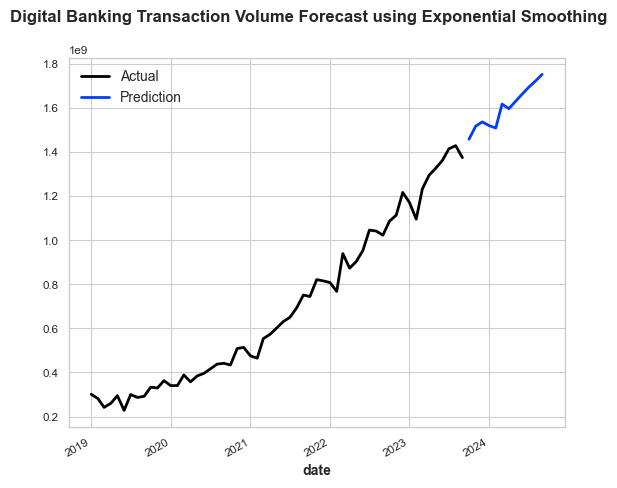

In [93]:
# Import pre-trained Exponential Smoothing model from pickle file
digital_banking_vol_exp_smoothing = pickle.load(open(model_path + 'digital_banking_vol_exp_smoothing.pkl', 'rb'))

# Forecast Digital Banking transaction volume using Exponential Smoothing model
pred_digital_banking_vol_exp_smoothing = pred_model(model=digital_banking_vol_exp_smoothing, len=forecast_horizon, train=digital_banking_vol)

# Plot the forecast result
plot_actual_pred(actual=digital_banking_vol, 
                 pred=pred_digital_banking_vol_exp_smoothing, 
                 suptitle='Digital Banking Transaction Volume Forecast using Exponential Smoothing', 
)

In [94]:
# Create a DataFrame for Digital Banking transaction volume forecast result
digital_banking_vol_exp_smoothing = out_pred_df(model=digital_banking_vol_exp_smoothing, 
                                                len=forecast_horizon,
                                                train=digital_banking_vol,
                                                type_name='Digital Banking',
                                                model_name='Exponential Smoothing',
                                                col_id='_vol'
)

# Show digital_banking_vol_exp_smoothing DataFrame
digital_banking_vol_exp_smoothing

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


  0%|          | 0/13 [00:00<?, ?it/s]

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWa

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol
0,2019-01-01,Digital Banking,Actual,3.010860e+08,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Digital Banking,Actual,2.815659e+08,NaN,NaN,NaN,NaN,NaN,-0.0648
2,2019-03-01,Digital Banking,Actual,2.415977e+08,NaN,NaN,NaN,NaN,NaN,-0.1419
3,2019-04-01,Digital Banking,Actual,2.602234e+08,NaN,NaN,NaN,NaN,NaN,0.0771
4,2019-05-01,Digital Banking,Actual,2.947539e+08,NaN,NaN,NaN,NaN,NaN,0.1327
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Digital Banking,Exponential Smoothing,1.627957e+09,0.03,48505583.0,38610993.0,2.6,0.2716,0.0203
78,2024-06-01,Digital Banking,Exponential Smoothing,1.661299e+09,0.03,48505583.0,38610993.0,2.6,0.2388,0.0205
79,2024-07-01,Digital Banking,Exponential Smoothing,1.692410e+09,0.03,48505583.0,38610993.0,2.6,0.2164,0.0187
80,2024-08-01,Digital Banking,Exponential Smoothing,1.720598e+09,0.03,48505583.0,38610993.0,2.6,0.1923,0.0167


#### | Digital Banking Nom Prophet Forecast

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


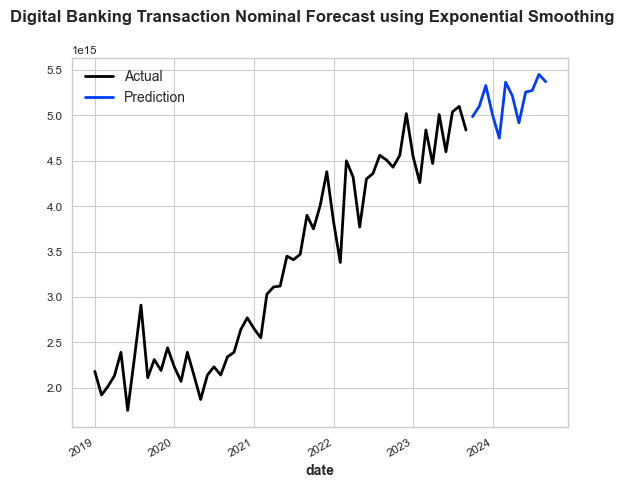

In [95]:
# Import pre-trained Exponential Smoothing model from pickle file
digital_banking_nom_exp_smoothing = pickle.load(open(model_path + 'digital_banking_nom_exp_smoothing.pkl', 'rb'))

# Forecast Digital Banking transaction nominal using Exponential Smoothing model
pred_digital_banking_nom_exp_smoothing = pred_model(model=digital_banking_nom_exp_smoothing, len=forecast_horizon, train=digital_banking_nom)

# Plot the forecast result
plot_actual_pred(actual=digital_banking_nom, 
                 pred=pred_digital_banking_nom_exp_smoothing, 
                 suptitle='Digital Banking Transaction Nominal Forecast using Exponential Smoothing', 
)

In [96]:
# Create a DataFrame for Digital Banking transaction nominal forecast result
digital_banking_nom_exp_smoothing = out_pred_df(model=digital_banking_nom_exp_smoothing, 
                                                len=forecast_horizon,
                                                train=digital_banking_nom,
                                                type_name='Digital Banking',
                                                model_name='Exponential Smoothing',
                                                col_id='_nom'
)

# Show digital_banking_nom_exp_smoothing DataFrame
digital_banking_nom_exp_smoothing

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


  0%|          | 0/13 [00:00<?, ?it/s]

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWa

component,date,type,model,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,Digital Banking,Actual,2.180000e+15,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Digital Banking,Actual,1.920000e+15,NaN,NaN,NaN,NaN,NaN,-0.1193
2,2019-03-01,Digital Banking,Actual,2.010000e+15,NaN,NaN,NaN,NaN,NaN,0.0469
3,2019-04-01,Digital Banking,Actual,2.130000e+15,NaN,NaN,NaN,NaN,NaN,0.0597
4,2019-05-01,Digital Banking,Actual,2.390000e+15,NaN,NaN,NaN,NaN,NaN,0.1221
...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Digital Banking,Exponential Smoothing,4.918310e+15,0.04,2.580744e+14,1.912362e+14,13.5,0.1330,-0.0570
78,2024-06-01,Digital Banking,Exponential Smoothing,5.257487e+15,0.04,2.580744e+14,1.912362e+14,13.5,0.0650,0.0690
79,2024-07-01,Digital Banking,Exponential Smoothing,5.274736e+15,0.04,2.580744e+14,1.912362e+14,13.5,0.0876,0.0033
80,2024-08-01,Digital Banking,Exponential Smoothing,5.452359e+15,0.04,2.580744e+14,1.912362e+14,13.5,0.0684,0.0337


#### | Digital Banking Vol & Digital Banking Nom Prophet Forecast Merge

In [97]:
# Merge digital_banking_vol_exp_smoothing and digital_banking_nom_exp_smoothing DataFrames
digital_banking_exp_smoothing = pd.merge(digital_banking_vol_exp_smoothing, digital_banking_nom_exp_smoothing, on=['date', 'type', 'model'])

# Show digital_banking_exp_smoothing DataFrame
digital_banking_exp_smoothing

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,Digital Banking,Actual,3.010860e+08,NaN,NaN,NaN,NaN,NaN,NaN,2.180000e+15,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Digital Banking,Actual,2.815659e+08,NaN,NaN,NaN,NaN,NaN,-0.0648,1.920000e+15,NaN,NaN,NaN,NaN,NaN,-0.1193
2,2019-03-01,Digital Banking,Actual,2.415977e+08,NaN,NaN,NaN,NaN,NaN,-0.1419,2.010000e+15,NaN,NaN,NaN,NaN,NaN,0.0469
3,2019-04-01,Digital Banking,Actual,2.602234e+08,NaN,NaN,NaN,NaN,NaN,0.0771,2.130000e+15,NaN,NaN,NaN,NaN,NaN,0.0597
4,2019-05-01,Digital Banking,Actual,2.947539e+08,NaN,NaN,NaN,NaN,NaN,0.1327,2.390000e+15,NaN,NaN,NaN,NaN,NaN,0.1221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Digital Banking,Exponential Smoothing,1.627957e+09,0.03,48505583.0,38610993.0,2.6,0.2716,0.0203,4.918310e+15,0.04,2.580744e+14,1.912362e+14,13.5,0.1330,-0.0570
78,2024-06-01,Digital Banking,Exponential Smoothing,1.661299e+09,0.03,48505583.0,38610993.0,2.6,0.2388,0.0205,5.257487e+15,0.04,2.580744e+14,1.912362e+14,13.5,0.0650,0.0690
79,2024-07-01,Digital Banking,Exponential Smoothing,1.692410e+09,0.03,48505583.0,38610993.0,2.6,0.2164,0.0187,5.274736e+15,0.04,2.580744e+14,1.912362e+14,13.5,0.0876,0.0033
80,2024-08-01,Digital Banking,Exponential Smoothing,1.720598e+09,0.03,48505583.0,38610993.0,2.6,0.1923,0.0167,5.452359e+15,0.04,2.580744e+14,1.912362e+14,13.5,0.0684,0.0337


### Combined all model's forecast DataFrames

In [98]:
# Create list for all forecast DataFrames per model
prophet_df = [debit_prophet, credit_prophet, ue_bank_prophet, ue_nonbank_prophet, qris_prophet, digital_banking_prophet]
autoarima_df = [debit_autoarima, credit_autoarima, ue_bank_autoarima, ue_nonbank_autoarima, qris_autoarima, digital_banking_autoarima]
exp_smoothing_df = [debit_exp_smoothing, credit_exp_smoothing, ue_bank_exp_smoothing, ue_nonbank_exp_smoothing, qris_exp_smoothing, digital_banking_exp_smoothing]

# Merge all forecast DataFrames into one DataFrame
forecast_merge= pd.concat([pd.concat(prophet_df), pd.concat(autoarima_df), pd.concat(exp_smoothing_df)])

# Show forecast_df DataFrame
forecast_merge

component,date,type,model,transaction_volume,mape_vol,rmse_vol,mae_vol,model_score_vol,yoy_growth_vol,mom_growth_vol,transaction_nominal,mape_nom,rmse_nom,mae_nom,model_score_nom,yoy_growth_nom,mom_growth_nom
0,2019-01-01,Debit,Actual,5.521845e+08,NaN,NaN,NaN,NaN,NaN,NaN,5.480000e+14,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,Debit,Actual,5.439533e+08,NaN,NaN,NaN,NaN,NaN,-0.0149,5.310000e+14,NaN,NaN,NaN,NaN,NaN,-0.0310
2,2019-03-01,Debit,Actual,5.858424e+08,NaN,NaN,NaN,NaN,NaN,0.0770,5.590000e+14,NaN,NaN,NaN,NaN,NaN,0.0527
3,2019-04-01,Debit,Actual,5.638822e+08,NaN,NaN,NaN,NaN,NaN,-0.0375,5.420000e+14,NaN,NaN,NaN,NaN,NaN,-0.0304
4,2019-05-01,Debit,Actual,6.068453e+08,NaN,NaN,NaN,NaN,NaN,0.0762,6.210000e+14,NaN,NaN,NaN,NaN,NaN,0.1458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2024-05-01,Digital Banking,Exponential Smoothing,1.627957e+09,0.03,48505583.0,38610993.0,2.6,0.2716,0.0203,4.918310e+15,0.04,2.580744e+14,1.912362e+14,13.5,0.1330,-0.0570
78,2024-06-01,Digital Banking,Exponential Smoothing,1.661299e+09,0.03,48505583.0,38610993.0,2.6,0.2388,0.0205,5.257487e+15,0.04,2.580744e+14,1.912362e+14,13.5,0.0650,0.0690
79,2024-07-01,Digital Banking,Exponential Smoothing,1.692410e+09,0.03,48505583.0,38610993.0,2.6,0.2164,0.0187,5.274736e+15,0.04,2.580744e+14,1.912362e+14,13.5,0.0876,0.0033
80,2024-08-01,Digital Banking,Exponential Smoothing,1.720598e+09,0.03,48505583.0,38610993.0,2.6,0.1923,0.0167,5.452359e+15,0.04,2.580744e+14,1.912362e+14,13.5,0.0684,0.0337


## Save the Forecast Result DataFrame

Save the dataframe using %store magic function so that it can be used in another notebook

In [99]:
%store forecast_merge

Stored 'forecast_merge' (DataFrame)
